<a href="https://colab.research.google.com/github/cecigolazo/3erSemanaProg/blob/main/PP1_GRUPO_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediccion de Riesgo Cardiaco




## Descripcion caracteristicas

**Objetivo:** predecir el riesgo de un ataque cardíaco

Features:

**Edad :** Edad del paciente

**Genero :** Generoo del paciente.

**Dolor en pecholor en pecho :** tipo de dolor en el pecho:

Valor 0: angina típica

Valor 1: angina atípica

Valor 2: dolor no anginoso

Valor 3: asintomático


**Presión arterial reposo :** presión arterial en reposo (en mm Hg)

** Colesterol :** colesterol en mg/dl obtenido mediante el sensor de IMC

**Glucemia :** (azúcar en sangre en ayunas > 120 mg/dl)

1 = verdadero

0 = falso

**rest_ecg :** resultados electrocardiográficos en reposo:

Valor 0: normal

Valor 1: tener anomalía de la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST > 0,05 mV)

Valor 2: muestra hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes

**thalach :** frecuencia cardíaca máxima alcanzada.

**exang :** angina inducida por el ejercicio:

1 = si

0 = no

**Depresión de STón de ST :** depresión del ST inducida por el ejercicio en relación con el reposo.

Depresión del ST: un tipo de anomalía del segmento ST. El segmento ST es la parte plana e isoeléctrica del ECG y representa el intervalo entre la despolarización y la repolarización ventricular.


**Pendiente ST :** la pendiente del segmento ST del ejercicio máximo

0 = sin pendiente

1 = plano

2 = descendente

** Numero de vasosmero de vasos :** number of major vessels (0-3)
thall - Thalium Stress Test result ~ (0,3)

**thall :** Talasemia(es un trastorno sanguíneo genético que se caracteriza por una tasa de hemoglobina más baja de lo normal.)

0 = nulo

1 = defecto reparado

2 = normales

3 = defecto reversible

**Diagnosticostico :** diagnóstico de enfermedad cardíaca (estado de enfermedad angiográfica)

0: < 50% de estrechamiento del diámetro. menos posibilidades de enfermedad cardíaca

1: > 50% de estrechamiento del diámetro. más posibilidades de sufrir enfermedades cardíacas

## Sugerencias para ejecutar el colab

1 - Restablaecer Entorno de Ejecución:

    Clic en Entorno de Ejecución en la barra de menú, y
    Seleccionar Restablecer Entorno de Ejecución para evitar posibles errores por ejecuciones anteriores.

2 - Ejecutar los imports y la carga de dataset

3 - Ejecutar el algoritmo deseado

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px

from google.colab import files

import io
from IPython.display import clear_output
clear_output()





## Carga dataset

In [ ]:
dataset = 'https://raw.githubusercontent.com/monsegutier/Grupo4-PP1--Proyecto-ML/main/data/heart.csv'

df = pd.read_csv(dataset)

df = df.drop_duplicates()
# df.drop_duplicates(inplace=True)
df



Edad  Genero  Dolor en pecho  Presión arterial reposo  Colesterol  \
0      63       1               3                      145         233   
1      37       1               2                      130         250   
2      41       0               1                      130         204   
3      56       1               1                      120         236   
4      57       0               0                      120         354   
..    ...     ...             ...                      ...         ...   
298    57       0               0                      140         241   
299    45       1               3                      110         264   
300    68       1               0                      144         193   
301    57       1               0                      130         131   
302    57       0               1                      130         236   

     Glucemia  Resultado ECC Reposo  Frecuencia Cardiaca  \
0           1                     0                  150   
1           0                     1                  187   
2           0                     0                  172   
3           0                     1                  178   
4           0                     1                  163   
..        ...                   ...                  ...   
298         0                     1                  123   
299         0                     1                  132   
300         1                     1                  141   
301         0                     1                  115   
302         0                     0                  174   

     Angina por ejercicio  Depresión de ST  Pendiente ST  Numero de vasos  \
0                       0              2.3             0                0   
1                       0              3.5             0                0   
2                       0              1.4             2                0   
3                       0              0.8             2                0   
4                       1              0.6             2                0   
..                    ...              ...           ...              ...   
298                     1              0.2             1                0   
299                     0              1.2             1                0   
300                     0              3.4             1                2   
301                     1              1.2             1                1   
302                     0              0.0             1                1   

     Talasemia  Diagnostico  
0            1            1  
1            2            1  
2            2            1  
3            2            1  
4            2            1  
..         ...          ...  
298          3            0  
299          3            0  
300          3            0  
301          3            0  
302          2            0  

[302 rows x 14 columns]

In [ ]:
df.describe()
df.info()
df.shape
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Edad                     302 non-null    int64  
 1   Genero                   302 non-null    int64  
 2   Dolor en pecho           302 non-null    int64  
 3   Presión arterial reposo  302 non-null    int64  
 4   Colesterol               302 non-null    int64  
 5   Glucemia                 302 non-null    int64  
 6   Resultado ECC Reposo     302 non-null    int64  
 7   Frecuencia Cardiaca      302 non-null    int64  
 8   Angina por ejercicio     302 non-null    int64  
 9   Depresión de ST          302 non-null    float64
 10  Pendiente ST             302 non-null    int64  
 11  Numero de vasos          302 non-null    int64  
 12  Talasemia                302 non-null    int64  
 13  Diagnostico              302 non-null    int64  
dtypes: float64(1), int64(13)
m

Edad  Genero  Dolor en pecho  Presión arterial reposo  Colesterol  \
0    63       1               3                      145         233   
1    37       1               2                      130         250   
2    41       0               1                      130         204   
3    56       1               1                      120         236   
4    57       0               0                      120         354   

   Glucemia  Resultado ECC Reposo  Frecuencia Cardiaca  Angina por ejercicio  \
0         1                     0                  150                     0   
1         0                     1                  187                     0   
2         0                     0                  172                     0   
3         0                     1                  178                     0   
4         0                     1                  163                     1   

   Depresión de ST  Pendiente ST  Numero de vasos  Talasemia  Diagnostico  
0              2.3             0                0          1            1  
1              3.5             0                0          2            1  
2              1.4             2                0          2            1  
3              0.8             2                0          2            1  
4              0.6             2                0          2            1

# ------ EDA ------

## Limpieza de datos

In [ ]:
#(no contiene valores nulos)
df.isnull().sum()


Edad                       0
Genero                     0
Dolor en pecho             0
Presión arterial reposo    0
Colesterol                 0
Glucemia                   0
Resultado ECC Reposo       0
Frecuencia Cardiaca        0
Angina por ejercicio       0
Depresión de ST            0
Pendiente ST               0
Numero de vasos            0
Talasemia                  0
Diagnostico                0
dtype: int64

In [ ]:
# Duplicados
df.duplicated().sum()  #(contiene un valor duplicado)

0

In [ ]:
df.value_counts()

Edad  Genero  Dolor en pecho  Presión arterial reposo  Colesterol  Glucemia  Resultado ECC Reposo  Frecuencia Cardiaca  Angina por ejercicio  Depresión de ST  Pendiente ST  Numero de vasos  Talasemia  Diagnostico
29    1       1               130                      204         0         0                     202                  0                     0.0              2             0                2          1              1
59    1       2               150                      212         1         1                     157                  0                     1.6              2             0                2          1              1
              1               140                      221         0         1                     164                  1                     0.0              2             0                2          1              1
              0               170                      326         0         0                     140                  1            

## Reporte Dataset

## Graficos

array([[<Axes: title={'center': 'Edad'}>,
        <Axes: title={'center': 'Genero'}>,
        <Axes: title={'center': 'Dolor en pecho'}>,
        <Axes: title={'center': 'Presión arterial reposo'}>],
       [<Axes: title={'center': 'Colesterol'}>,
        <Axes: title={'center': 'Glucemia'}>,
        <Axes: title={'center': 'Resultado ECC Reposo'}>,
        <Axes: title={'center': 'Frecuencia Cardiaca'}>],
       [<Axes: title={'center': 'Angina por ejercicio'}>,
        <Axes: title={'center': 'Depresión de ST'}>,
        <Axes: title={'center': 'Pendiente ST'}>,
        <Axes: title={'center': 'Numero de vasos'}>],
       [<Axes: title={'center': 'Talasemia'}>,
        <Axes: title={'center': 'Diagnostico'}>, <Axes: >, <Axes: >]],
      dtype=object)

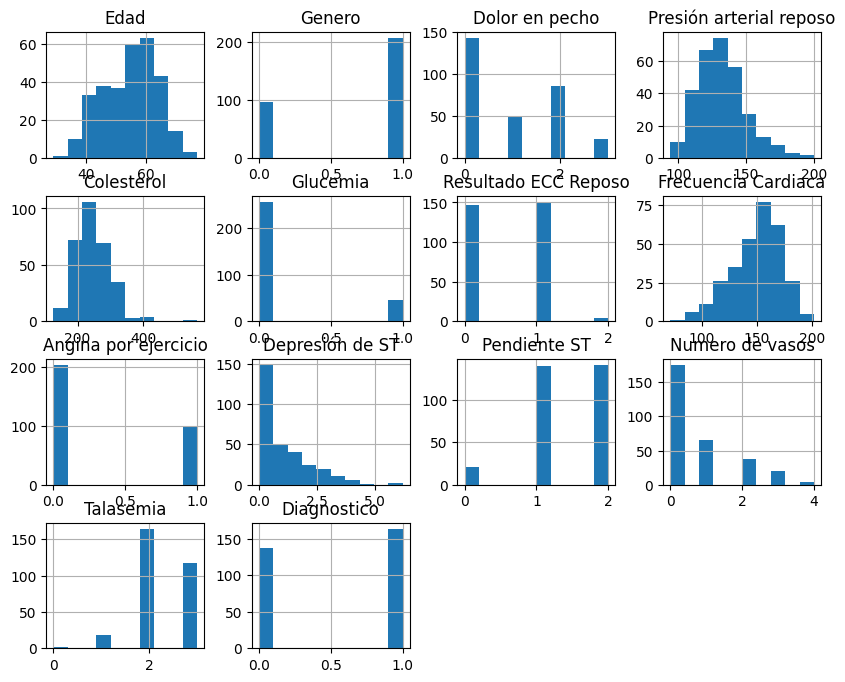

In [ ]:
df.hist(figsize=(10,8))

In [ ]:
matriz = df.corr()
print (matriz)

                             Edad    Genero  Dolor en pecho  \
Edad                     1.000000 -0.094962       -0.063107   
Genero                  -0.094962  1.000000       -0.051740   
Dolor en pecho          -0.063107 -0.051740        1.000000   
Presión arterial reposo  0.283121 -0.057647        0.046486   
Colesterol               0.207216 -0.195571       -0.072682   
Glucemia                 0.119492  0.046022        0.096018   
Resultado ECC Reposo    -0.111590 -0.060351        0.041561   
Frecuencia Cardiaca     -0.395235 -0.046439        0.293367   
Angina por ejercicio     0.093216  0.143460       -0.392937   
Depresión de ST          0.206040  0.098322       -0.146692   
Pendiente ST            -0.164124 -0.032990        0.116854   
Numero de vasos          0.302261  0.113060       -0.195356   
Talasemia                0.065317  0.211452       -0.160370   
Diagnostico             -0.221476 -0.283609        0.432080   

                         Presión arterial reposo  Cole

Mapa de calor

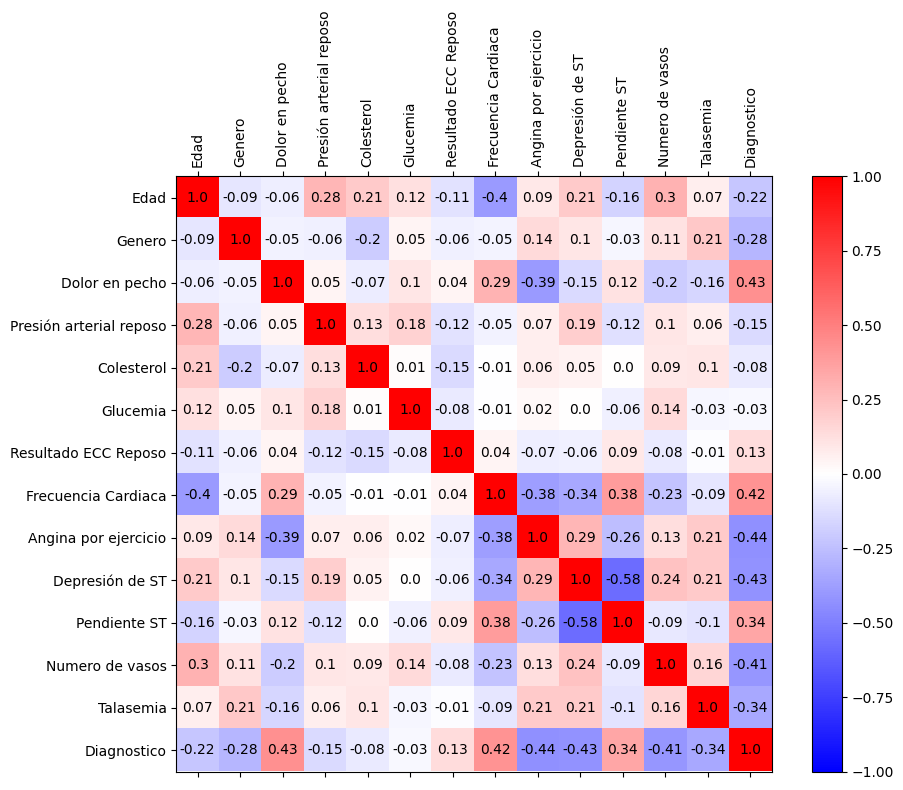

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

cax = ax.matshow(matriz, cmap="bwr", vmin=-1, vmax=1)

ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.columns)))
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.columns)


for i in range(len(df.columns)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, round(matriz.iloc[i, j], 2),
                       ha="center", va="center", color="black", fontsize=10)

cbar = fig.colorbar(cax)

plt.tight_layout()

plt.show()

In [ ]:
#Creating bins and labels
bins = [17,30,45,100]
labels = ['Adultos_jovenes','Adultos_mediana_edad','Adultos_mayores']
df['Edad'] = pd.cut(df['Edad'],bins = bins, labels = labels)

<Axes: xlabel='Edad', ylabel='Count'>

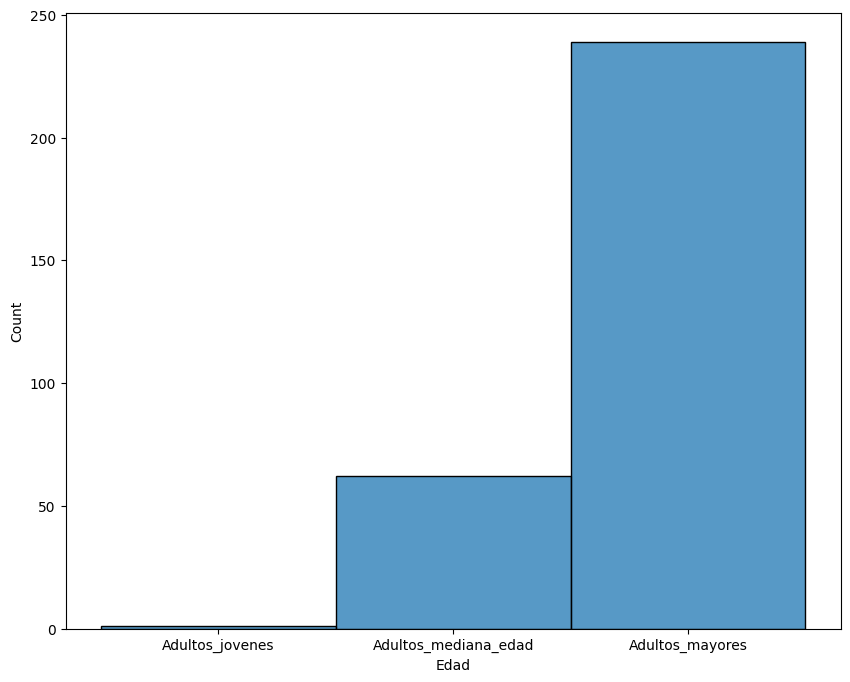

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(df['Edad'])

In [ ]:
bins = [0, 120, 130, 140, 200]
labels = ['Presión sanguínea normal', 'Presión sanguínea elevada', 'Presión sanguínea muy elevada', 'Presión sanguínea límite']

# Restringimos los datos al rango de los bins
df['Presión arterial reposo'] = pd.cut(df['Presión arterial reposo'], bins=bins, labels=labels)

<ipython-input-31-70c62fed82a5>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


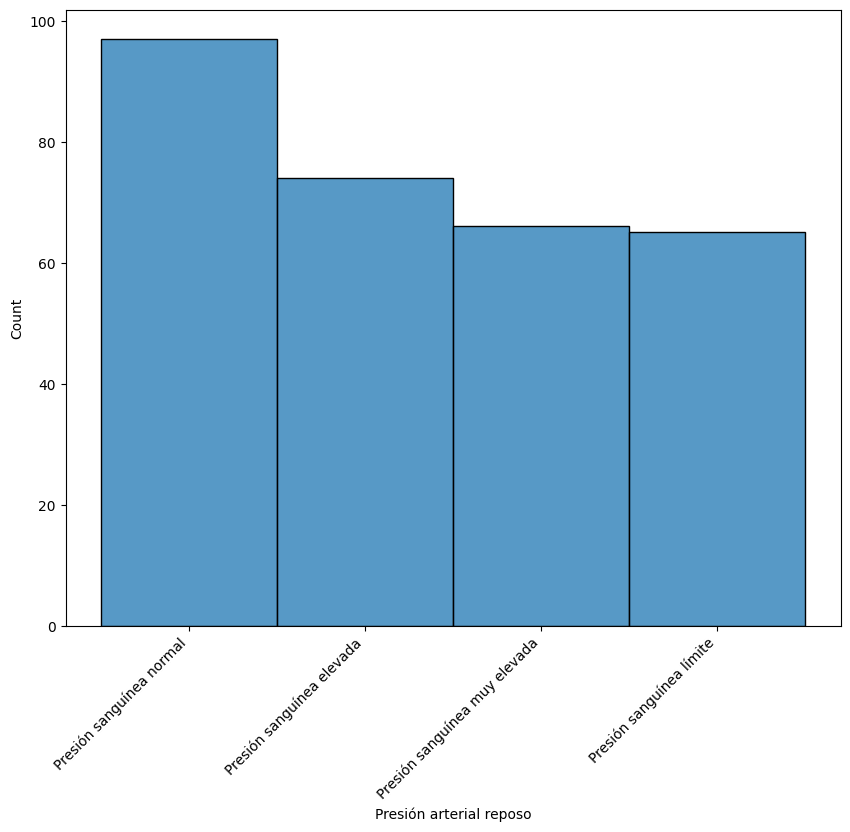

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.histplot(df['Presión arterial reposo'])

# Rotamos las etiquetas del eje x en 45 grados para mejorar la legibilidad
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

In [ ]:
bins = [126,200,240,564]
labels = ['Colesterol_optimo','Colesterol_intermedio','Colesterol_alto']
df['Colesterol'] = pd.cut(df['Colesterol'],bins = bins, labels = labels)

<Axes: xlabel='Colesterol', ylabel='Count'>

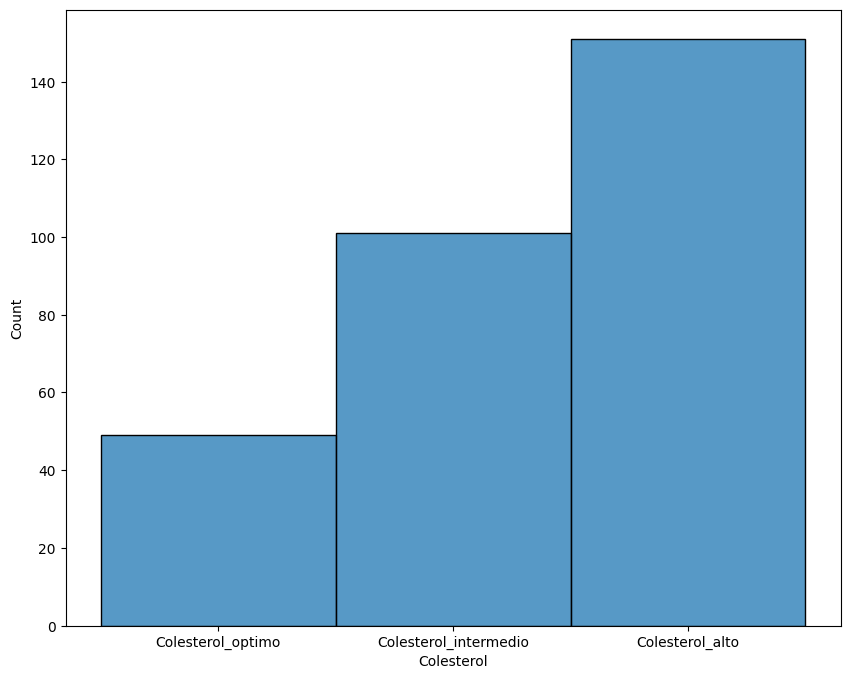

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(df['Colesterol'])

Graficos de torta

In [ ]:
normal_chol = df.loc[df['Colesterol']=='Colesterol_optimo']
elvate_chol = df.loc[df['Colesterol']=='Colesterol_intermedio']
high_chol = df.loc[df['Colesterol']=='Colesterol_alto']


normal_bp = df.loc[df['Presión arterial reposo']=='Presión sanguínea normal']
elvate_bp = df.loc[df['Presión arterial reposo']=='Presión sanguínea elevada']
high_bp = df.loc[df['Presión arterial reposo']=='Presión sanguínea muy elevada']
vhigh_bp = df.loc[df['Presión arterial reposo']=='Presión sanguínea límite']

In [ ]:
value = [len(normal_bp),len(elvate_bp),len(high_bp),len(vhigh_bp)]
name = ['Presión sanguínea normal','Presión sanguínea elevada','Presión sanguínea muy elevada','Presión sanguínea límite']

value2 = [len(normal_chol),len(elvate_chol),len(high_chol)]
name2 = ['Colesterol_optimo','Colesterol_intermedio','Colesterol_alto']

In [ ]:
px.pie(values = value,names=name,title= "Presion sanguinea de los pacientes")

In [ ]:
px.pie(values = value2,names=name2,title= "Niveles de colesterol de los pacientes")

Análisis de datos explicativos Algunas ideas útiles tanto para empresas como para empresas de investigación farmacéutica:

1 - Según las lecturas del gráfico circular, el 32,1% de los pacientes tienen presión arterial normal, mientras que el 24,5% de los pacientes tienen presión arterial elevada y el 43,4% de los pacientes tienen presión arterial alta.

2 -Según las lecturas del gráfico circular, el 16,3% de los pacientes tienen niveles de colesterol normales, mientras que el 33,6% de los pacientes tienen niveles de colesterol intermedios y el 50,2% de los pacientes tienen niveles de colesterol altos.

3 - Según nuestro diagrama de caja, podemos inferir que el pico antiguo promedio para la pendiente del segmento ST del ejercicio máximo del tipo 1 es el más alto y el del tipo 3 el más bajo.

4 - Según nuestros gráficos de barras, podemos estar seguros de que los adultos mayores tienen niveles de colesterol más altos que los adultos de mediana edad y los más jóvenes.

5 - Según nuestros gráficos de barras, podemos estar seguros de que los adultos mayores tienen presión arterial muy alta en comparación con los adultos de mediana edad y los más jóvenes.

6 - Según nuestros gráficos de barras, podemos estar seguros de que los adultos mayores tienen niveles altos de colesterol y, por lo tanto, niveles altos de presión arterial y es probable que sean más propensos a sufrir un ataque cardíaco en comparación con los adultos de mediana edad y más jóvenes.

In [ ]:
# imports
!pip install ydata-profiling
from ydata_profiling import ProfileReport
clear_output()

In [ ]:
# Generar Reporte de Data Profiling
profile = ProfileReport(df,title="Reporte dataset Riesgo Cardiaco")
profile.to_file("reporte.html")



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Mostrar el reporte
profile

In [ ]:
print(df.head(5))
df.info()
df.describe()
print ("Shape: ", df.shape)
df.columns



                   Edad  Genero  Dolor en pecho    Presión arterial reposo  \
0       Adultos_mayores       1               3   Presión sanguínea límite   
1  Adultos_mediana_edad       1               2  Presión sanguínea elevada   
2  Adultos_mediana_edad       0               1  Presión sanguínea elevada   
3       Adultos_mayores       1               1   Presión sanguínea normal   
4       Adultos_mayores       0               0   Presión sanguínea normal   

              Colesterol  Glucemia  Resultado ECC Reposo  Frecuencia Cardiaca  \
0  Colesterol_intermedio         1                     0                  150   
1        Colesterol_alto         0                     1                  187   
2  Colesterol_intermedio         0                     0                  172   
3  Colesterol_intermedio         0                     1                  178   
4        Colesterol_alto         0                     1                  163   

   Angina por ejercicio  Depresión de ST  Pe

Index(['Edad', 'Genero', 'Dolor en pecho', 'Presión arterial reposo',
       'Colesterol', 'Glucemia', 'Resultado ECC Reposo', 'Frecuencia Cardiaca',
       'Angina por ejercicio', 'Depresión de ST', 'Pendiente ST',
       'Numero de vasos', 'Talasemia', 'Diagnostico'],
      dtype='object')

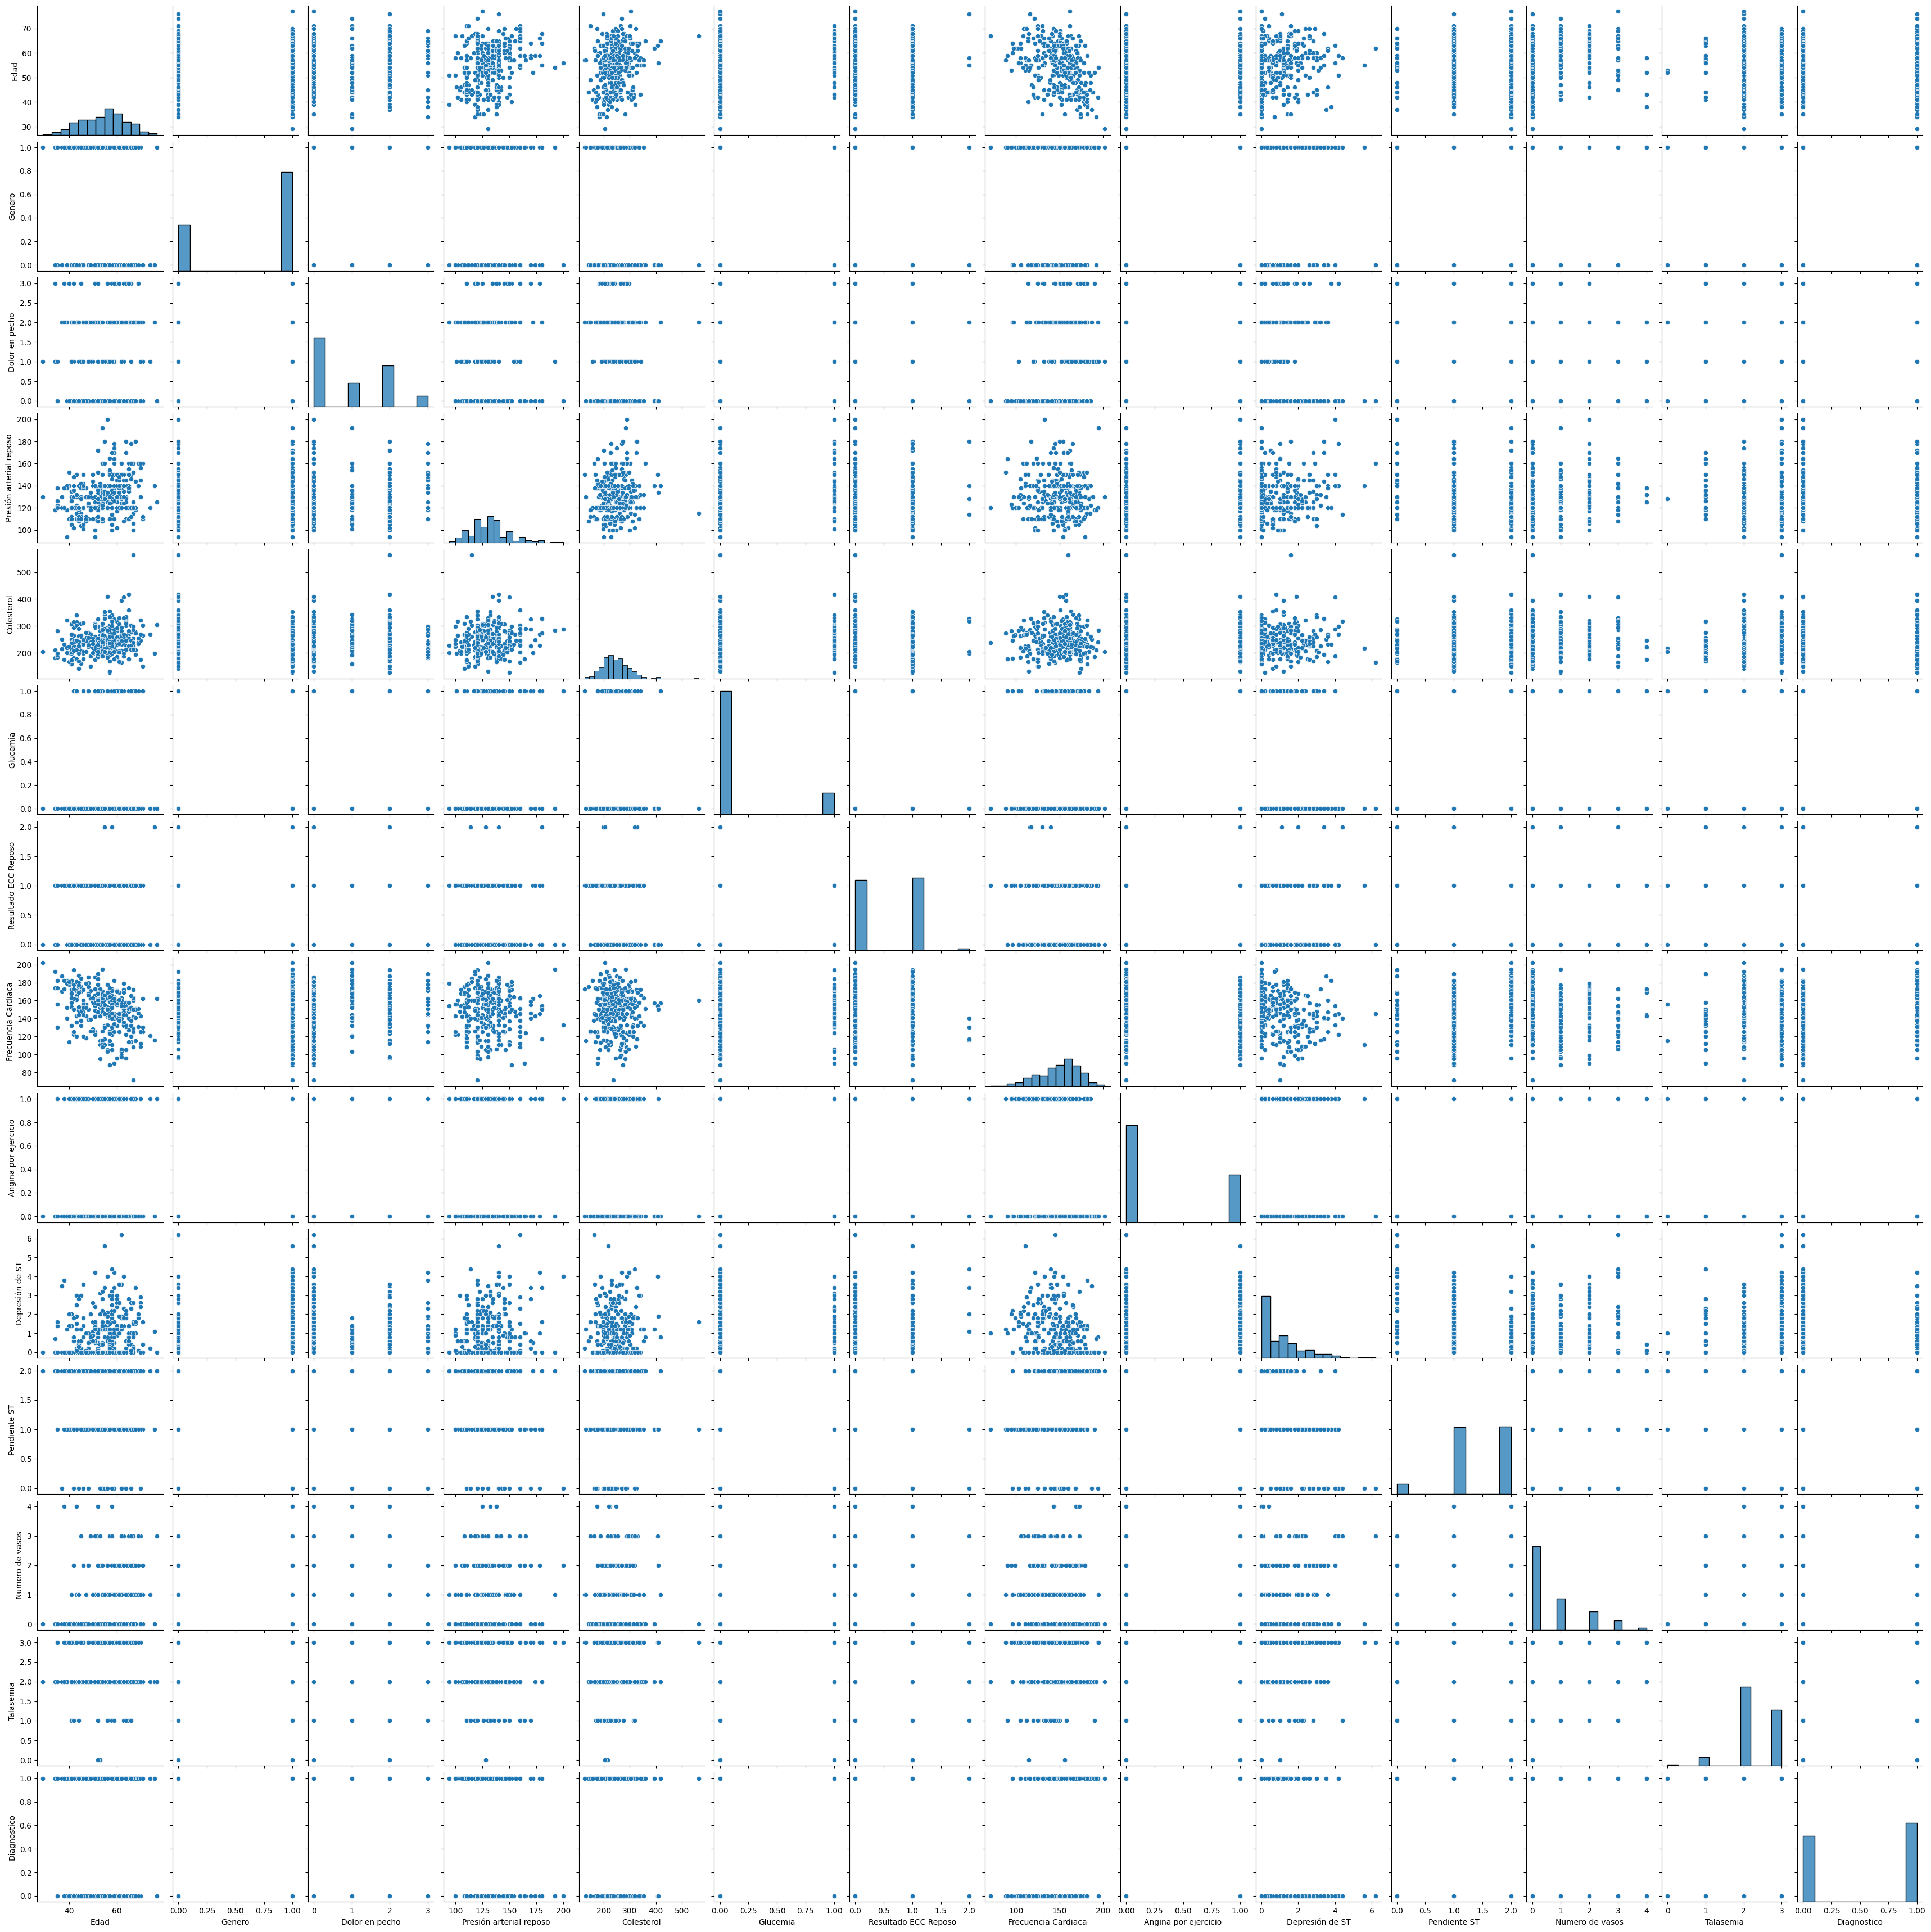

In [ ]:
# Crear un pairplot del DataFrame
sns.pairplot(df)
plt.show()

In [ ]:
# Genera un informe de perfil
profile = ProfileReport(df, title="Informe de Perfil", explorative=True)

# Muestra el informe en el cuaderno de Colab
profile.to_notebook_iframe()

NameError: ignored

## Graficos Adic

Estadísticas descriptivas para Edad y Presión arterial reposo:
             Edad  Presión arterial reposo
count  303.000000               303.000000
mean    54.366337               131.623762
std      9.082101                17.538143
min     29.000000                94.000000
25%     47.500000               120.000000
50%     55.000000               130.000000
75%     61.000000               140.000000
max     77.000000               200.000000

Tabla de frecuencia para Genero:
1    207
0     96
Name: Genero, dtype: int64

Tabla de frecuencia para Dolor en pecho:
0    143
2     87
1     50
3     23
Name: Dolor en pecho, dtype: int64


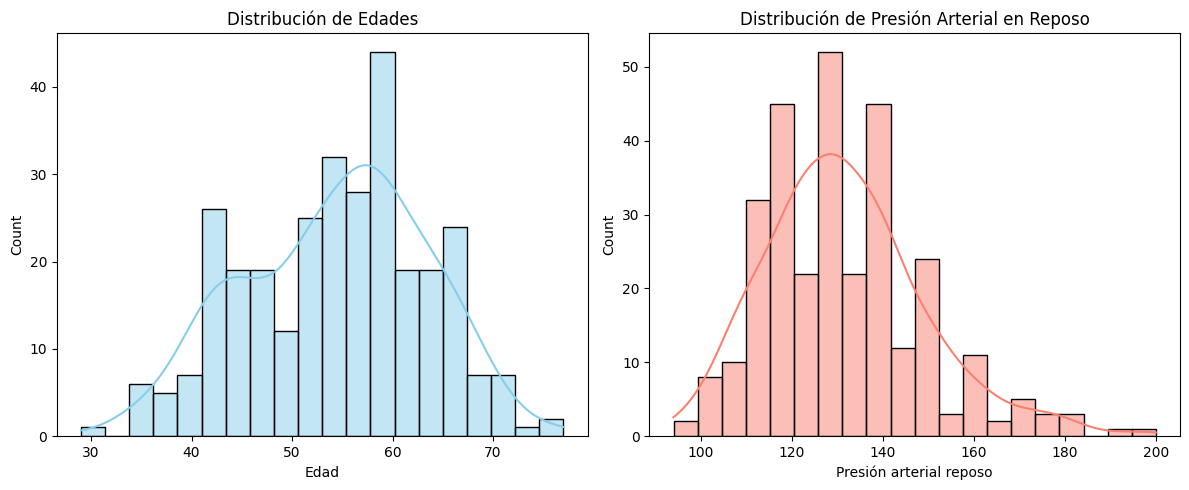

In [ ]:
# Estadísticas descriptivas para las variables numéricas (Edad y Presión arterial reposo)
estadisticas_numericas = df[['Edad', 'Presión arterial reposo']].describe()

# Tablas de frecuencia para las variables categóricas (Genero y Dolor en pecho)
tabla_frecuencia_Genero = df['Genero'].value_counts()
tabla_frecuencia_Dolor_en_pecho = df['Dolor en pecho'].value_counts()
print("Estadísticas descriptivas para Edad y Presión arterial reposo:")
print(estadisticas_numericas)
print("\nTabla de frecuencia para Genero:")
print(tabla_frecuencia_Genero)
print("\nTabla de frecuencia para Dolor en pecho:")
print(tabla_frecuencia_Dolor_en_pecho)

# Histogramas para `Edad` y `Presión arterial reposo`
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Edad'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de Edades')

plt.subplot(1, 2, 2)
sns.histplot(df['Presión arterial reposo'], bins=20, kde=True, color='salmon')
plt.title('Distribución de Presión Arterial en Reposo')
plt.tight_layout()

plt.show()

## --- *SweetViz*

In [ ]:
!pip install sweetviz
import sweetviz as sw
clear_output()


In [ ]:
#Análisis de Datos
reporte_analisis =sw.analyze(df)
reporte_analisis.show_html ('Diagnostico.html', open_browser=True)


                                             |          | [  0%]   00:00 -> (? left)

Report Diagnostico.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Test chi cuadrado


 Para determinar si dos variables categóricas o nominales pueden estar o no relacionadas.

 H0) Las variables sno independientes.

 H1) Las variables no son independientes.

In [ ]:
from scipy.stats import chi2_contingency
from statsmodels.graphics.mosaicplot import mosaic

#contamos la cant de hombres y mujeres, tomando como 1 y 0 respectivamente, con y sin diagnostico
hombres_con = df[(df['Genero'] == 1) & (df['Diagnostico'] == 1)]['Diagnostico'].count()
hombres_sin = df[(df['Genero'] == 1) & (df['Diagnostico'] == 0)]['Diagnostico'].count()
mujeres_con = df[(df['Genero'] == 0) & (df['Diagnostico'] == 1)]['Diagnostico'].count()
mujeres_sin = df[(df['Genero'] == 0) & (df['Diagnostico'] == 0)]['Diagnostico'].count()

#Ver si los datos tienen más de cinco conteos en cada combinación
#print(hombres_con_enfermedad, hombres_sin_enfermedad,mujeres_con_enfermedad, mujeres_sin_enfermedad)
#tabla de contingencia
data = np.array([[hombres_con, hombres_sin],
                 [mujeres_con, mujeres_sin]])
print (data)

#prueba de chi-cuadrado, nos calcula los valores esperados para cada combinación
chi2, p, _, _ = chi2_contingency(data)

print(f"Estadístico de chi-cuadrado: {chi2}")
print(f"Valor p: {p}")

#Prueba (nivel de significancia de 0.05)
if p < 0.05:
    print("En base a la evidencia muestral la asociación es significativa\
    entre Generoo del paciente y el diagnostico.")
else:
    print("No hay evidencia significativa de asociación.")

#relacion entre tipo de dolor y Diagnostico
#tabla de contingencia entre "Dolor en pecho" y "Diagnostico"
tabla_contingencia = pd.crosstab(df['Dolor en pecho'], df['Diagnostico'])
print (tabla_contingencia)
# Realizar la prueba de chi-cuadrado
chi2, p, _, _ = chi2_contingency(tabla_contingencia)

print(f"Estadístico de chi-cuadrado: {chi2}")
print(f"Valor p: {p}")

#Prueba
if p < 0.05:
    print("En base a la evidencia muestral la asociación entre\
    el tipo de dolor y el diagnostico del paciente es significativa.")
else:
    print("No hay evidencia significativa")

#La variables Generoo y tipo de dolor
tabla = pd.crosstab(df['Genero'], df['Dolor en pecho'])

# Realizar la prueba de chi-cuadrado
chi2, p, _, _ = chi2_contingency(tabla)

# Imprimir los resultados
print(f"Estadístico de chi-cuadrado: {chi2}")
print(f"Valor p: {p}")

#Prueba
if p < 0.05:
    print("La asociación entre es significativa.")
else:
    print("No hay evidencia significativa de asociación entre el Generoo y tipo de dolor.")

[[ 92 114]
 [ 72  24]]
Estadístico de chi-cuadrado: 23.083879459669042
Valor p: 1.5508552054949547e-06
En base a la evidencia muestral la asociación es significativa    entre Generoo del paciente y el diagnostico.
Diagnostico       0   1
Dolor en pecho         
0               104  39
1                 9  41
2                18  68
3                 7  16
Estadístico de chi-cuadrado: 80.97876150785669
Valor p: 1.8926838351935918e-17
En base a la evidencia muestral la asociación entre    el tipo de dolor y el diagnostico del paciente es significativa.
Estadístico de chi-cuadrado: 7.1006186360498
Valor p: 0.06875893200193163
No hay evidencia significativa de asociación entre el Generoo y tipo de dolor.


## Test t-student

Para determinar si hay diferencias significativas en las variables numéricas y grupos de variables categoricas

Estadístico t: -0.9864931536208362
Valor p: 0.3246834797221042
No hay evidencia significativa de diferencia en la presión arterial en reposo entre hombres y mujeres.
Estadístico t: -3.5029368327219244
Valor p: 0.000529966610622664
Hay una diferencia significativa en el colesterol entre hombres y mujeres.


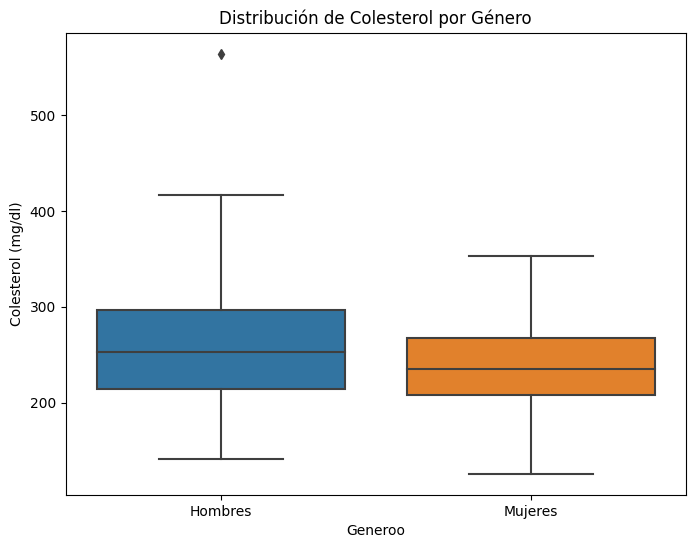

In [ ]:
#diferencias presión arterial en reposo) entre los diferentes generos
#Separaro los datos de presión arterial para hombres y mujeres
presion_hombres = df[df['Genero'] == 1]['Presión arterial reposo']
presion_mujeres = df[df['Genero'] == 0]['Presión arterial reposo']

#t de Student para dos muestras independientes
t_stat, p_valor = stats.ttest_ind(presion_hombres, presion_mujeres)


print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_valor}")

#Prueba
if p_valor < 0.05:
    print("Hay una diferencia significativa en la presión arterial en reposo entre hombres y mujeres.")
else:
    print("No hay evidencia significativa de diferencia en la presión arterial en reposo entre hombres y mujeres.")


#diferencias de colesterol entre los diferentes generos
#Separarolos datos de colesterol para hombres y mujeres
presion_hombres = df[df['Genero'] == 1]['Colesterol']
presion_mujeres = df[df['Genero'] == 0]['Colesterol']

#t de Student para dos muestras independientes
t_stat, p_valor = stats.ttest_ind(presion_hombres, presion_mujeres)

print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_valor}")

# Prueba
if p_valor < 0.05:
    print("Hay una diferencia significativa en el colesterol entre hombres y mujeres.")
else:
    print("No hay evidencia significativa de diferencia en el colesterol entre hombres y mujeres.")

#boxplot entre colesterol y género
plt.figure(figsize=(8, 6))
sns.boxplot(x='Genero', y='Colesterol', data=df)
plt.xlabel('Generoo')
plt.ylabel('Colesterol (mg/dl)')
plt.xticks([0, 1], ['Hombres', 'Mujeres'])
plt.title('Distribución de Colesterol por Género')
plt.show()

# -----MODELOS-----


# -- Regresion logistica --

In [ ]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(max_iter = 10000, verbose = 0)

In [ ]:
X = df.drop(['Diagnostico'], axis=1)
y = df['Diagnostico']

In [ ]:
print(logit.fit(X,y))
print(logit.score(X,y))

LogisticRegression(max_iter=10000)
0.8443708609271523


In [ ]:
# dividir X e y en sets de entrenamiento y de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# comprobar X_train y X_test
X_train.shape, X_test.shape

((241, 13), (61, 13))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# entrenamos un modelo de regresión logística en el conjunto de entrenamiento
from sklearn.linear_model import LogisticRegression

# instanciamos el modelo
logreg = LogisticRegression(solver='liblinear', random_state=0)

# modelo
logreg.fit(X_train, y_train)

print(logreg.score(X_test, y_test))

0.8852459016393442


In [ ]:
y_pred_test = logreg.predict(X_test)

Métricas

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8852


Matriz de confusión


In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)


Confusion matrix

 [[23  4]
 [ 3 31]]


<Axes: >

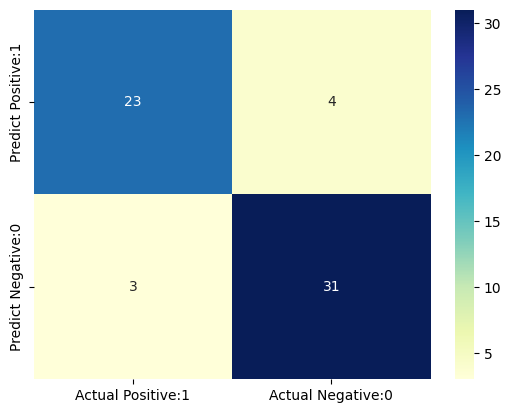

In [ ]:
# visualizar confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
#Informe de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [ ]:
#Precisión de la clasificación
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification error : 0.1148
Precision : 0.8519
Recall or Sensitivity : 0.8846
False Positive Rate : 0.1143
Specificity : 0.8857


false positive: se define como el ratio entre el número de falsos positivos y el número de negativos (reales). Lógicamente, el clasificador ideal tendría un FPR de cero (pues no tendría falsos positivos), y el peor clasificador posible tendría un FPR de uno (todos los negativos reales serían identificados erróneamente como positivos)

In [ ]:
y_test.value_counts()

1    34
0    27
Name: Diagnostico, dtype: int64

In [ ]:
from sklearn.metrics import balanced_accuracy_score, f1_score

# Calcular la precisión balanceada
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_test)
balanced_accuracy

0.8818082788671024

In [ ]:
# Calcular la medida F1
f1 = f1_score(y_test, y_pred_test)
f1

0.8985507246376812

ROC

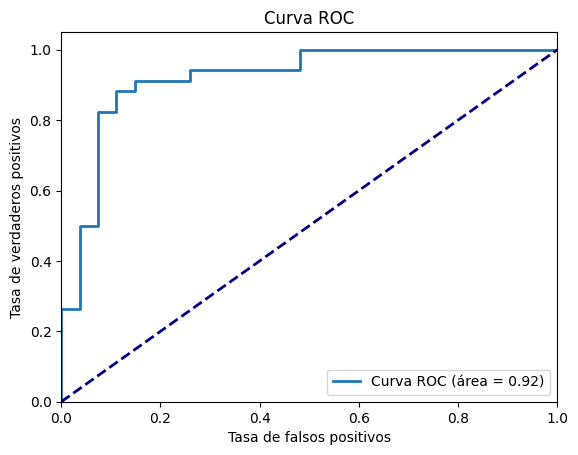

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calcular las probabilidades de la clase positiva
y_score = logreg.predict_proba(X_test)[:,1]

# Calcular los puntos para la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_score)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Dibujar la curva ROC
plt.figure()
plt.plot(fpr, tpr, lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Evaluación


In [ ]:
# calculate cross-validated ROC AUC
from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8934


In [ ]:
# Validación cruzada k-fold
# Aplicación de la validación cruzada por quintuplicado

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.71428571 0.8125     0.83333333 0.83333333 0.85416667]


In [ ]:
#Podemos resumir la precisión de la validación cruzada calculando su media.
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8095


Chequeamos overfitting y underfitting

In [ ]:
#Comparamos la precisión del conjunto de entrenamiento y del conjunto de prueba.
y_pred_train = logreg.predict(X_train)


In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8340
Test set score: 0.8852


Best params

In [ ]:
from sklearn.model_selection import GridSearchCV

parametros= {
    "penalty" : ['l1','l2'],
    'C':np.logspace(-3,3,7),
}

clf = GridSearchCV(logreg, parametros, scoring="accuracy",cv=6)
clf.fit(X_train, y_train)
print('Hiperparámetros: ', clf.best_params_)
print(clf.best_score_)
print('\n\nEstimador elegido:','\n\n', (clf.best_estimator_))
print('Puntuación del CV de GridSearch en test set: {0:0.4f}'.format(clf.score(X_test, y_test)))


Hiperparámetros:  {'C': 10.0, 'penalty': 'l1'}
0.8300813008130081


Estimador elegido: 

 LogisticRegression(C=10.0, penalty='l1', random_state=0, solver='liblinear')
Puntuación del CV de GridSearch en test set: 0.8852


La precisión de la prueba de nuestro modelo original es de 0,8852, mientras que la precisión de GridSearch CV es de 0,8852. Podemos ver que GridSearch CV no mejora el rendimiento de este modelo en particular.

# -- Arbol de decision --

Importacion del Modelo

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Division del dataset 80/20 para train/test

In [ ]:
# train - test

X = df.drop(['Diagnostico'], axis=1)
y = df['Diagnostico']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# comprobar X_train y X_test
X_train.shape, X_test.shape



((241, 13), (61, 13))

Este modelo no requiere estandarizacion

In [ ]:
# estandarizacion No hace falta para el arbol de decision.


# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

Entrenamiento y Evaluacion del modelo

In [ ]:
# entrenar modelo

## "Por Defecto"  Precisión del modelo: 0.7704918032786885"
# clf = DecisionTreeClassifier(random_state=42)

# Testeamos algunos hiperparametros para orientarnos
# Elegimos pocos niveles para no complejizar el arbol y un nivel de sample_split conservador
# para preservarnos lo mas posible de hacer overfit

# 4 niveles precision 0.8032786885245902
# clf = DecisionTreeClassifier(max_depth=4, min_samples_split=6,random_state=42)

# 4 niveles con gini  precision 0.8032786885245902
# clf = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=6,random_state=42)

# 4 niveles con entropia precision 0.819672131147541
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=6, random_state=42)


## MSE  no se usa porque es para regresion

clf.fit(X_train, y_train)


# predecir

y_pred = clf.predict(X_test)


# Evaluar rendimiento con test set

accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')


Precisión del modelo: 0.819672131147541


Busqueda de posibles optimizaciones

In [ ]:
# EXISTE ALGUNA PREDICCION MEJOR CON OTROS HIPERPARAMETROS?

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
# Definir los valores a probar para cada hiperparámetro
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 6, 10],
    'criterion': ['gini', 'entropy']
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=kf, scoring='accuracy')

# Realizar la búsqueda en la cuadrícula
grid_search.fit(X, y)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

best_params = grid_search.best_params_
print("Mejores hiperparámetros encontrados:")
print(best_params)


best_score = grid_search.best_score_
print(f"Mejor puntuación de rendimiento: {best_score:.4f}")

from sklearn.model_selection import cross_val_score

# Utiliza los mejores hiperparámetros encontrados en GridSearchCV
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
best_criterion = best_params['criterion']

# Crea un nuevo modelo con los mejores hiperparámetros
best_clf = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_samples_split, criterion=best_criterion)

# Calcula la precisión utilizando validación cruzada
cv_scores = cross_val_score(best_clf, X, y, cv=kf, scoring='accuracy')

# Calcula la media y la desviación estándar de la precisión
mean_accuracy = cv_scores.mean()
std_accuracy = cv_scores.std()

print(f"Precisión promedio: {mean_accuracy:.4f}")
print(f"Desviación estándar de la precisión: {std_accuracy:.4f}")



Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 10}
Mejor puntuación de rendimiento: 0.8014
Precisión promedio: 0.8014
Desviación estándar de la precisión: 0.0553


In [ ]:
# VALIDACION CRUZADA Sobre el modelo inicial, de 4 niveles de profundidad

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

clf = DecisionTreeClassifier(criterion='entropy', max_depth=4 , min_samples_split=6, random_state=42)
# clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
mean_accuracy = cross_val_scores.mean()
std_accuracy = cross_val_scores.std()
print(f'Precisión promedio de la validación cruzada: {mean_accuracy:.4f}')
print(f'Desviación estándar de la precisión: {std_accuracy:.4f}')


Precisión promedio de la validación cruzada: 0.7982
Desviación estándar de la precisión: 0.0426


Comparando el modelo sugerido por gridsearch y el que veniamos usando,  hay una pequeña mejora en la prediccion promedio y una leve caida de la desv estandar de la misma, a costa de una mayor nivel de complejidad.  (4 vs 6 niveles), Elegimos seguir trabajando con 4 niveles.

Para corroborar lo anterior, comparamos los distintos niveles de poda y comprobanos que 4 niveles es suficiente para mejorar la precision y no entrar en overfitting

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Suponiendo que tienes tus datos en las variables X_train, y_train para entrenamiento
# y X_test, y_test para prueba.

# Crear un árbol de decisión sin restricciones (sin poda) para entrenar
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=2)
clf.fit(X_train, y_train)

# Evaluar el rendimiento en el conjunto de prueba antes de la poda
y_pred = clf.predict(X_test)
accuracy_before_pruning = accuracy_score(y_test, y_pred)
print(f"Precisión antes de la poda: {accuracy_before_pruning:.4f}")

# Probar diferentes niveles de poda y encontrar el mejor nivel
best_accuracy = 0
best_depth = None

for depth in range(1, 11):  # Probar niveles de poda del 1 al 10
    pruned_clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, min_samples_split=10)
    pruned_clf.fit(X_train, y_train)
    y_pred_pruned = pruned_clf.predict(X_test)
    accuracy_after_pruning = accuracy_score(y_test, y_pred_pruned)
    print(f"Precisión después de la poda (Profundidad {depth}): {accuracy_after_pruning:.4f}")

    if accuracy_after_pruning > best_accuracy:
        best_accuracy = accuracy_after_pruning
        best_depth = depth

print(f"Mejor precisión después de la poda: {best_accuracy:.4f} (Profundidad {best_depth})")



Precisión antes de la poda: 0.7705
Precisión después de la poda (Profundidad 1): 0.7213
Precisión después de la poda (Profundidad 2): 0.7377
Precisión después de la poda (Profundidad 3): 0.7869
Precisión después de la poda (Profundidad 4): 0.8033
Precisión después de la poda (Profundidad 5): 0.8033
Precisión después de la poda (Profundidad 6): 0.7705
Precisión después de la poda (Profundidad 7): 0.8033
Precisión después de la poda (Profundidad 8): 0.8033
Precisión después de la poda (Profundidad 9): 0.7705
Precisión después de la poda (Profundidad 10): 0.7869
Mejor precisión después de la poda: 0.8033 (Profundidad 4)


Seleccion de caracteristicas

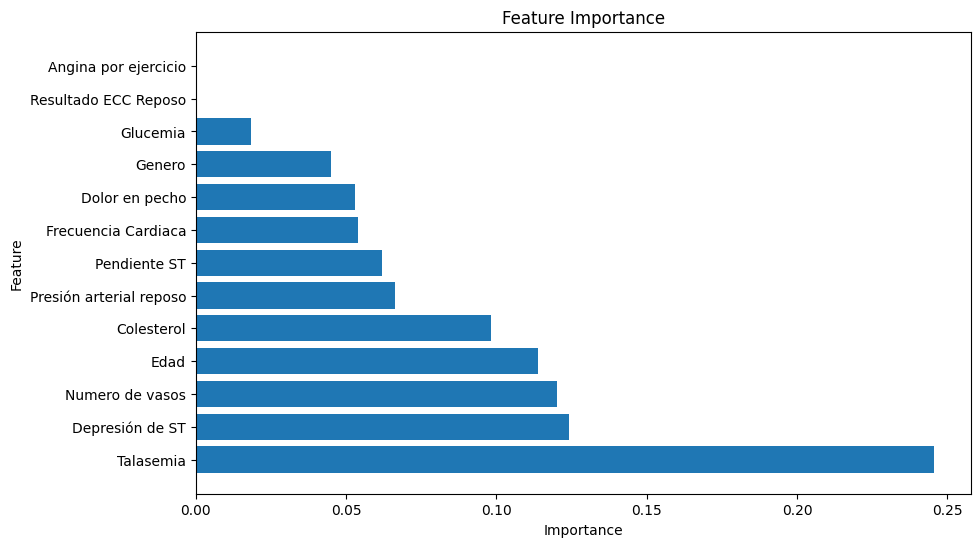

                    Feature  Importance
12                Talasemia    0.245595
9           Depresión de ST    0.124155
11          Numero de vasos    0.120053
0                      Edad    0.113676
4                Colesterol    0.098344
3   Presión arterial reposo    0.066086
10             Pendiente ST    0.061857
7       Frecuencia Cardiaca    0.053910
2            Dolor en pecho    0.052818
1                    Genero    0.045081
5                  Glucemia    0.018425
6      Resultado ECC Reposo    0.000000
8      Angina por ejercicio    0.000000

Precisión del modelo con características seleccionadas: 0.6721311475409836


In [ ]:
# SELECCION DE CARACTERISTICAS

from sklearn.tree import DecisionTreeClassifier

# Entrenar un modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importance = clf.feature_importances_

# Obtener los nombres de las características
feature_names = X_train.columns

# Crear un DataFrame para visualizar la importancia de las características
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Ordenar las características por importancia descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Imprimir la tabla de importancia de características
print(importance_df)


# Determinar cuántas características conservar
num_features_to_keep = len(importance_df) // 2 #(la mitad)

# Seleccionar las características más importantes
selected_features = importance_df['Feature'][:num_features_to_keep]

# Crear un nuevo DataFrame con las características seleccionadas
X_selected = X[selected_features]


# Dividir el conjunto de datos de características seleccionadas en entrenamiento y prueba
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Entrenar el modelo de árbol de decisión en el conjunto de características seleccionadas
clf_selected = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
# clf_selected = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf_selected.fit(X_train_selected, y_train)

# Predecir con el conjunto de prueba de características seleccionadas
y_pred_selected = clf_selected.predict(X_test_selected)

# Calcular la precisión del modelo en el conjunto de prueba de características seleccionadas
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print()
print(f'Precisión del modelo con características seleccionadas: {accuracy_selected}')

Por ultimo, vemos que la eleccion de talasemia como la caracteristica mas importante para el alg, no se condice con la practica en la vida real, donde no se considera un factor determinante para la prediccion del riesgo cardiaco,
las mas imporantes son la angina por ejercicio y el resultado ECC reposo, a las que no se le asigno importancia
Asi que descartamos este camino de optimizacion por el momento.

Visualizaciones

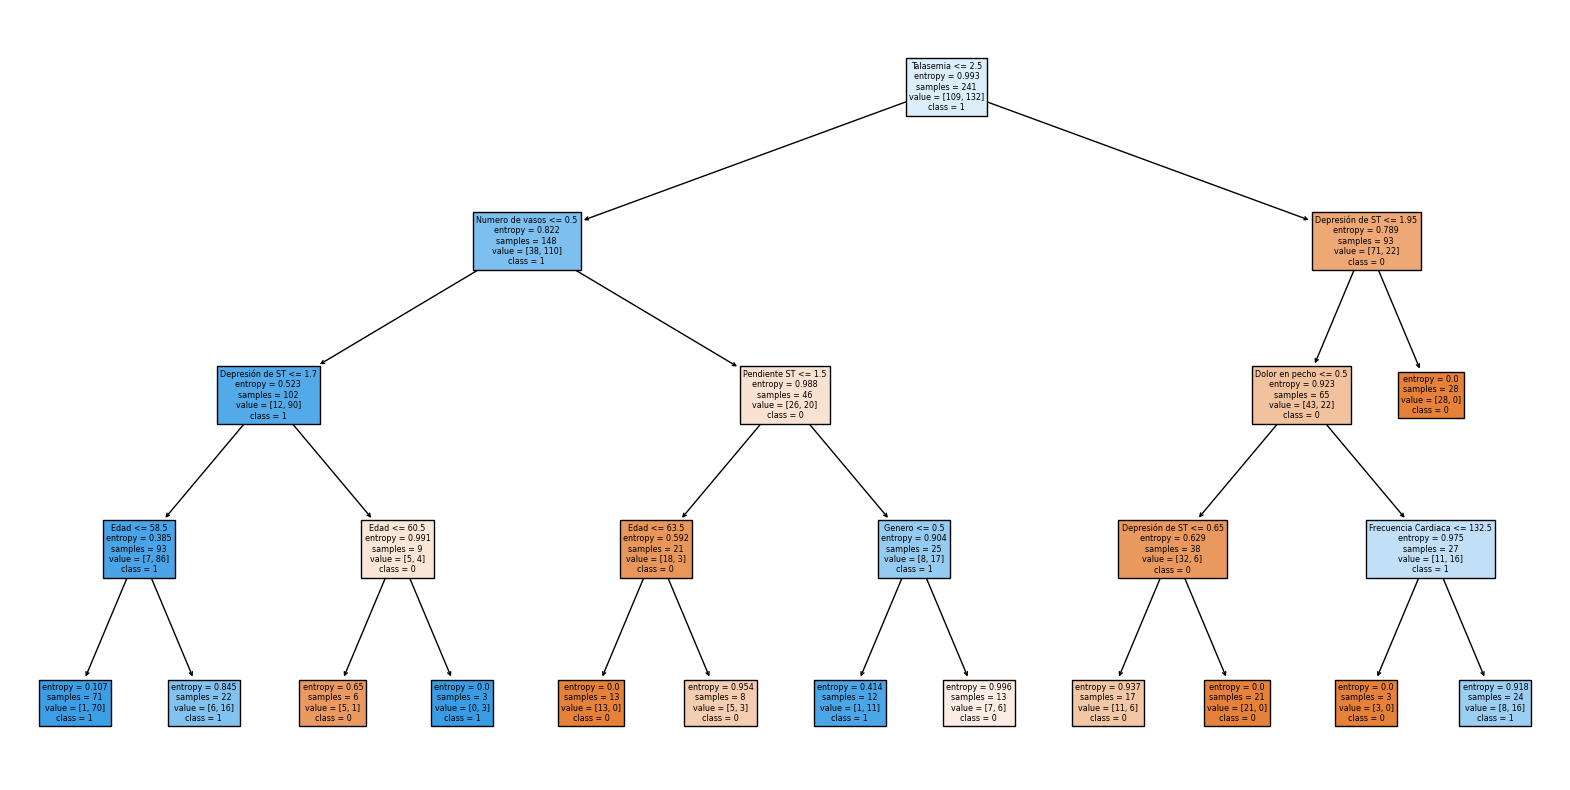

In [ ]:
# VISUALIZACION DEL ARBOL

from sklearn.tree import plot_tree

## 4 niveles con entropia precision 0.819672131147541
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

clf.fit(X_train, y_train)



plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.show()


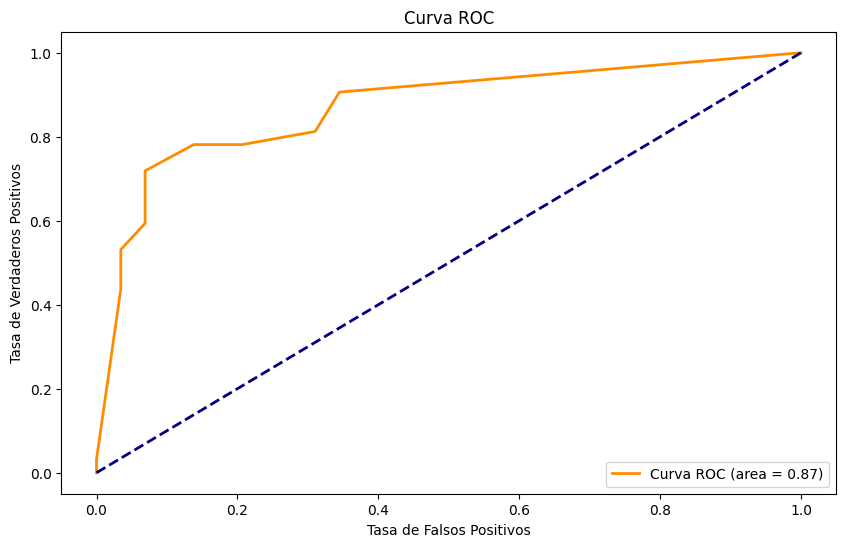

Área bajo la curva ROC (AUC): 0.87


In [ ]:
# CURVA ROC

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular las probabilidades de las clases positivas para el conjunto de prueba
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Imprimir la métrica AUC
print(f'Área bajo la curva ROC (AUC): {roc_auc:.2f}')


El area de la curva Roc esta cercana a 1, con lo cual podemos inferir que esta prediciendo bien.

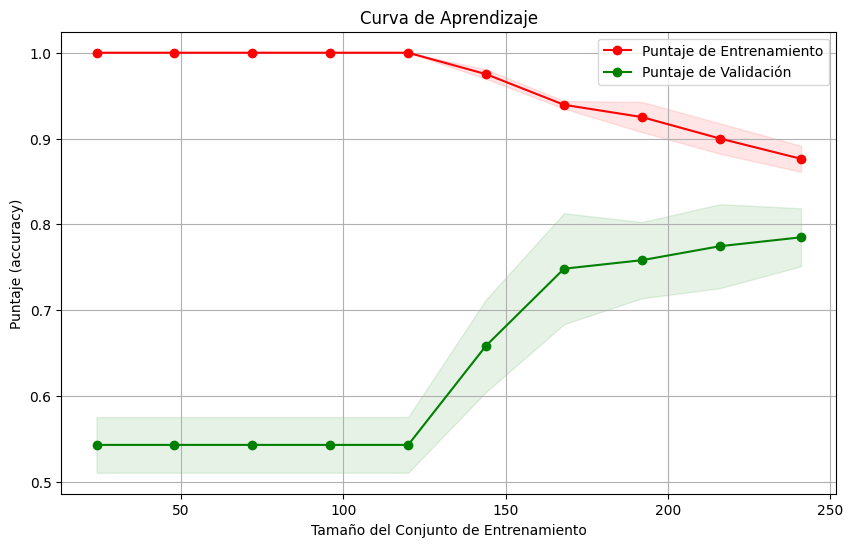

In [ ]:
# CURVA DE APRENDIZAJE


from sklearn.model_selection import learning_curve

# # Definir el modelo
# clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)

# Definir la métrica que deseas evaluar (en este caso, accuracy)
scoring = 'accuracy'

# Generar las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(clf, X, y, cv=kf, scoring=scoring, train_sizes=np.linspace(0.1, 1.0, 10))

# Calcular las medias y desviaciones estándar de los puntajes
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotear la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Puntaje ({})".format(scoring))
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Puntaje de Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Puntaje de Validación")

plt.legend(loc="best")
plt.show()


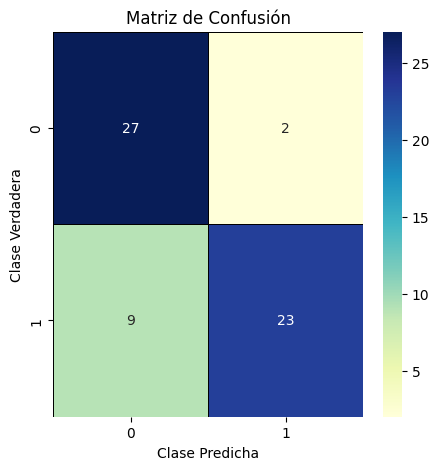

In [ ]:
# MATRIZ DE CONFUSION

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
y_pred = clf.predict(X_test)
confusion_mtx = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión usando Seaborn
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.5, linecolor="black", fmt=".0f", cmap='YlGnBu')
plt.xlabel("Clase Predicha")
plt.ylabel("Clase Verdadera")
plt.title("Matriz de Confusión")
plt.show()


Se concluye que un árbol de decisión con 4 niveles de profundidad, un min_samples_split de 6 y criterio de entropía proporciona una predicción aceptable sin sobreajuste. No obstante, se necesitaria mejorar los falsos negativos si este algoritmo resulta ser el que mejor predice respecto a los otros.  Una posible solucion seria seleecion de caracteristicas.

# -- Random Forest --

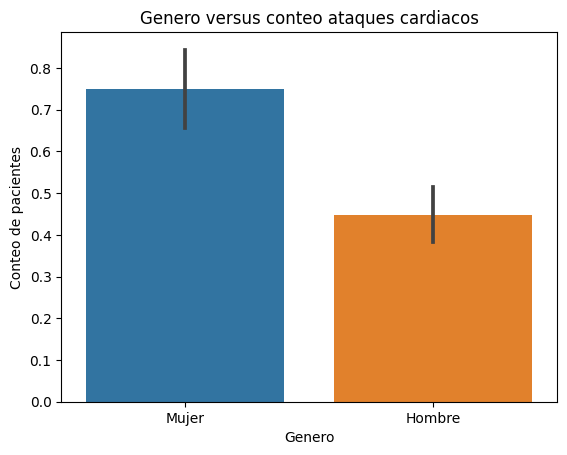

In [ ]:
# Sex vs Heart Attack
ax = sns.barplot(x = 'Genero',y = 'Diagnostico',data = df)
ax.set(xlabel='Genero', ylabel='Conteo de pacientes', title='Genero versus conteo ataques cardiacos')
ax.set_xticklabels(['Mujer', 'Hombre'])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
# X contendrá las características y y contendrá la variable objetivo que se utilizará para entrenar
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standarizcaion:  No aplica al modelo, por lo cual se comenta
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)


In [ ]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy:", ("%.2f" % accuracy), "%")

Accuracy: 85.25 %


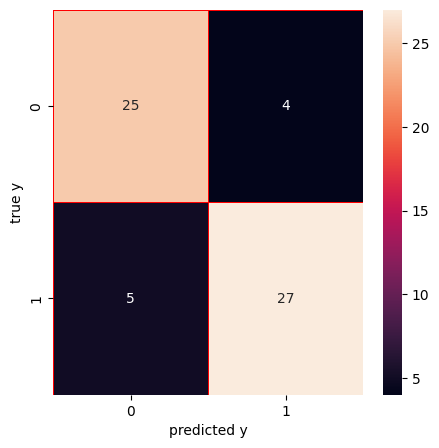

In [ ]:
y_head = rf.predict(X_test)
y_true = y_test
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_head)


f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("predicted y")
plt.ylabel("true y")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc


y_score = rf.predict_proba(X_test)[:,1]  # Probabilidades de la clase positiva

fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


NameError: ignored

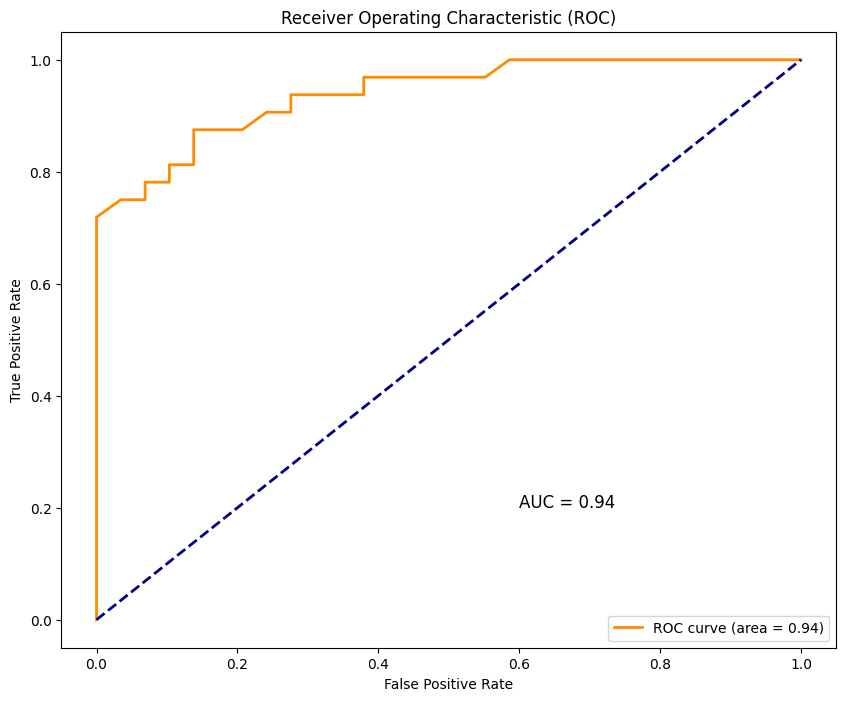

In [ ]:
from sklearn.metrics import roc_curve, auc



# Graficar la curva ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Mostrar el valor de AUC en la esquina de la figura
plt.text(0.6, 0.2, 'AUC = %0.2f' % roc_auc, fontsize=12)
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score



# Definir los hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar el clasificador Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# Inicializar GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Realizar la búsqueda en la cuadrícula
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores Hiperparámetros:", best_params)

# Obtener el mejor modelo
best_rf_model = grid_search.best_estimator_

# Evaluar el modelo en el conjunto de prueba
y_pred = best_rf_model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC en conjunto de prueba: {roc_auc:.2f}')


Mejores Hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
ROC AUC en conjunto de prueba: 0.87


In [ ]:
# Mejoramiento de Random Forest
from sklearn.ensemble import RandomForestClassifier

# Inicializar el clasificador Random Forest con los mejores hiperparámetros encontrados
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=2, random_state=42)

# Entrenar el modelo
rf_classifier.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

# Calcular la precisión
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC en conjunto de prueba: {roc_auc:.2f}')


ROC AUC en conjunto de prueba: 0.89


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)

print(f'Precisión del modelo: {accuracy * 100:.2f}%')


Precisión del modelo: 88.52%


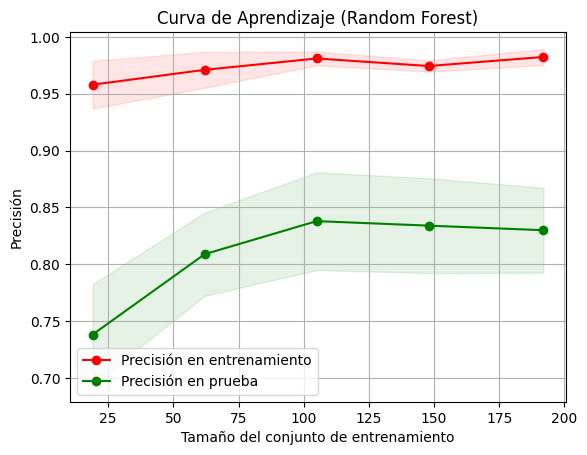

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Tamaño del conjunto de entrenamiento")
    plt.ylabel("Precisión")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Precisión en entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Precisión en prueba")

    plt.legend(loc="best")
    return plt

# Uso del código
title = "Curva de Aprendizaje (Random Forest)"
estimator = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=2, random_state=42)
plot_learning_curve(estimator, title, X_train, y_train, cv=5, n_jobs=-1)

plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


# Define el modelo de Random Forest
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=2, random_state=42)

# Aplica validación cruzada para obtener puntuaciones de evaluación
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')

# Imprime las puntuaciones de validación cruzada
print("Puntuaciones de Validación Cruzada:", cv_scores)
print("Precisión Media:", cv_scores.mean())


Puntuaciones de Validación Cruzada: [0.83606557 0.8852459  0.83333333 0.8        0.8       ]
Precisión Media: 0.830928961748634


#-- KNN --

Elección de Variables
A continuación vamos a dividir el dataset, separando las variables predictoras (o independientes) de las variables a predecir (o dependientes). Como nuestro objetivo es predecir un posible ataque del corazón, la variable de respuesta será la columna **`"Diagnostico"`** que representaremos como **`"y"`**, mientras que el resto de columnas conformarán nuestras variables de entrada que llamaremos **`"X"`**.

In [ ]:
X = df.drop("Diagnostico", axis=1)
y = df.Diagnostico
X.head(10)

Edad  Genero  Dolor en pecho  Presión arterial reposo  Colesterol  \
0    63       1               3                      145         233   
1    37       1               2                      130         250   
2    41       0               1                      130         204   
3    56       1               1                      120         236   
4    57       0               0                      120         354   
5    57       1               0                      140         192   
6    56       0               1                      140         294   
7    44       1               1                      120         263   
8    52       1               2                      172         199   
9    57       1               2                      150         168   

   Glucemia  Resultado ECC Reposo  Frecuencia Cardiaca  Angina por ejercicio  \
0         1                     0                  150                     0   
1         0                     1                  187                     0   
2         0                     0                  172                     0   
3         0                     1                  178                     0   
4         0                     1                  163                     1   
5         0                     1                  148                     0   
6         0                     0                  153                     0   
7         0                     1                  173                     0   
8         1                     1                  162                     0   
9         0                     1                  174                     0   

   Depresión de ST  Pendiente ST  Numero de vasos  Talasemia  
0              2.3             0                0          1  
1              3.5             0                0          2  
2              1.4             2                0          2  
3              0.8             2                0          2  
4              0.6             2                0          2  
5              0.4             1                0          1  
6              1.3             1                0          2  
7              0.0             2                0          3  
8              0.5             2                0          3  
9              1.6             2                0          2

------

Division del Dataset
El siguiente paso consiste en usar el metodo **`train_test_split`** para dividir nuestro set de datos en las porciones que usaremos para entranamiento y para test, pruebas o validación. En este caso vamos a ir por una proporción muy utilizada, repartiendo 80/20 para **train y test** respectivamente. Luego revisaremos como se encuentran los datos para determinar si es necesario reescalar.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
print('Maximos: \n',X_train.max(),'\n \n Mínimas: \n',X_train.min(),'\n')
print('Means: \n',X_train.mean(),'\n \n Std: \n',X_train.std())

Maximos: 
 Edad                        77.0
Genero                       1.0
Dolor en pecho               3.0
Presión arterial reposo    200.0
Colesterol                 409.0
Glucemia                     1.0
Resultado ECC Reposo         2.0
Frecuencia Cardiaca        202.0
Angina por ejercicio         1.0
Depresión de ST              6.2
Pendiente ST                 2.0
Numero de vasos              4.0
Talasemia                    3.0
dtype: float64 
 
 Mínimas: 
 Edad                        29.0
Genero                       0.0
Dolor en pecho               0.0
Presión arterial reposo     94.0
Colesterol                 126.0
Glucemia                     0.0
Resultado ECC Reposo         0.0
Frecuencia Cardiaca         88.0
Angina por ejercicio         0.0
Depresión de ST              0.0
Pendiente ST                 0.0
Numero de vasos              0.0
Talasemia                    0.0
dtype: float64 

Means: 
 Edad                        54.340249
Genero                       0.684647

Como puede visualizarse en la salida anterior lso valores de nuestros datos se encuentran bastante alejados uno de los otros, por lo reescalaremos para acercar los valores a valores mas óptimos y faciles de manejar.
Como parte del preprocesamiento de los datos usaremos un reescalado standard y lo haremos importando dicho metodo desde la libreria **Scikit-Learn**. En caso de haber encontrado Outliers en el EDA inicial, deberiamos de haber seleccionado otro tipo de estandarización.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print('Maximos: \n',pd.DataFrame(X_train).max(),'\n \n Mínimas: \n',pd.DataFrame(X_train).min(),'\n')
print('Means: \n',pd.DataFrame(X_train).mean(),'\n \n Std: \n',pd.DataFrame(X_train).std())

Maximos: 
 0     2.462663
1     0.678680
2     2.057693
3     3.818829
4     3.430830
5     2.467435
6     2.734250
7     2.355993
8     1.392489
9     4.260863
10    0.964611
11    3.200926
12    1.094849
dtype: float64 
 
 Mínimas: 
 0    -2.753979
1    -1.473449
2    -0.935691
3    -2.086129
4    -2.464237
5    -0.405279
6    -1.041992
7    -2.816084
8    -0.718139
9    -0.889676
10   -2.241889
11   -0.714928
12   -3.915124
dtype: float64 

Means: 
 0     1.658424e-16
1     1.842694e-17
2    -3.869657e-17
3    -6.854821e-16
4     1.474155e-17
5    -2.948310e-17
6    -4.791004e-17
7    -1.437301e-16
8    -7.370775e-18
9    -1.778200e-16
10    1.229998e-16
11    5.159543e-17
12   -1.593930e-16
dtype: float64 
 
 Std: 
 0     1.002081
1     1.002081
2     1.002081
3     1.002081
4     1.002081
5     1.002081
6     1.002081
7     1.002081
8     1.002081
9     1.002081
10    1.002081
11    1.002081
12    1.002081
dtype: float64


Como se puede apreciar, ahora los valores se encuentran en una escala mas pareja, garantizando asi que todas las caracteristicas sean igualmente importantes para los calculos del algoritmo a utilizar, permitiendo de esta forma obtener un mejor desempeño.

Importación del Algoritmo

Para este caso, vamos a probar con el algoritmo KNN en su faceta de Clasificación. Comenzamos importando desde Sklearn el algoritmo y seleccionando la cantidad de parametros a utilizar. En este caso comenzamos con 5 vecinos.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors =  5
KNN_cl = KNeighborsClassifier(n_neighbors =n_neighbors)

-----

Entrenamiento del Algoritmo

In [ ]:
KNN_cl.fit(X_train,y_train)

y_train_pred = KNN_cl.predict(X_train)
y_test_pred = KNN_cl.predict(X_test)

Evaluación del Modelo

In [ ]:
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print('Porcentaje de aciertos sobre el set de entrenamiento:', train_acc)
print('Porcentaje de aciertos sobre el set de evaluación:',test_acc)

Porcentaje de aciertos sobre el set de entrenamiento: 0.8796680497925311
Porcentaje de aciertos sobre el set de evaluación: 0.8032786885245902


Al tratarse de una prueba practica que nos permite conocer el algoritmo y ver su funcionamiento, simplemente evaluamos su **`Accuracy`** donde vemos que seleccionando la cantidad de 5 vecinos, obtenemos un puntuación de **87%** para entrenamiento y **80%** para test. Si bien los valores son bastantes aceptables, vemos que existe una separación considerable entre ambos resultados, por lo que intentaremos de mejorar esto en la siguiente celda de codigo.

-----

Antes de entrar en procesos de optimización innecesaria, vamos a buscar aquella cantidad de vecindades que nos devuelvan mejores valores, para ellos recorreremos una lista con diferentes opciones en cuanto a cantidad de vecinos a usar.

In [ ]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40]


# Generamos en loop sobre los distintos valores de k
for k in k_vecinos:

    # Vamos a repetir el siguiente bloque de código

    # Definir el modelo con el valor de vecinos deseado
    KNN_cl = KNeighborsClassifier(n_neighbors=k)

    # Entrenar el modelo
    KNN_cl.fit(X_train,y_train)

    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = KNN_cl.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)

    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = KNN_cl.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)

    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

----

Una vez realizada la busqueda de hiperparametros mas optima, procedemos a graficar la curva que estos valores nos presentan.

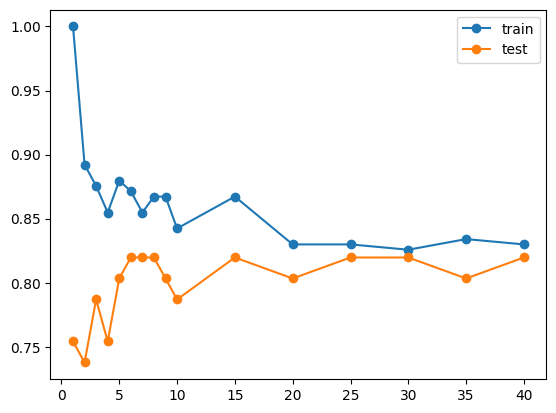

In [ ]:
import matplotlib.pyplot as plt

plt.plot(k_vecinos,lista_accuracy_train,'o-',label='train' )
plt.plot(k_vecinos,lista_accuracy_test,'o-',label='test')
plt.legend()

-----

A simpla vista podemos como varia nuestro **Accuracy** según la cantidad de vecinos utilizamos, vamos a probar con la cantidad de 8 vecinos que parece ser la que mejor responde en este caso.

In [ ]:
# Seleccionamos la cantidad de vecinos mas optima
n_neighbors =  8
KNN_cl = KNeighborsClassifier(n_neighbors =n_neighbors)

# Reentrenamos el modelo
KNN_cl.fit(X_train,y_train)
# Volvemos a tomar las predicciones
y_train_pred = KNN_cl.predict(X_train)
y_test_pred = KNN_cl.predict(X_test)

In [ ]:
# Evaluamos el modelo
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print('Porcentaje de aciertos sobre el set de entrenamiento:', train_acc)
print('Porcentaje de aciertos sobre el set de evaluación:',test_acc)

Porcentaje de aciertos sobre el set de entrenamiento: 0.8672199170124482
Porcentaje de aciertos sobre el set de evaluación: 0.819672131147541


Evaluación de métricas
Habiendo obtenido el accuracy del modelo, procederemos a evaluar otras métricas que pueden ser importantes y quizas nos entreguen algun concepto a analizar y tener en cuenta. Veremos para ello primero la calidad de las predicciones y a continuacion la capacidad del modelo para clasificar las clases.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score

Calidad del modelo
Una vez importadas las métricas, vamos a calcularlas y luego a graficarlas.

In [ ]:
confusion = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

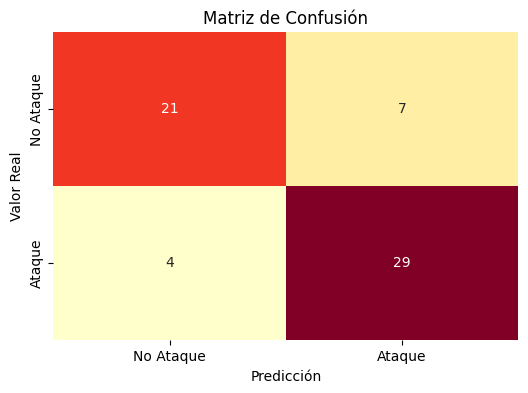

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlOrRd', cbar=False,
            xticklabels=['No Ataque', 'Ataque'], yticklabels=['No Ataque', 'Ataque'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
print('Precisión (Accuracy):', accuracy)
print('Precisión (Precision):', precision)
print('Sensibilidad (Recall):', recall)
print('Puntaje F1:', f1)

Precisión (Accuracy): 0.819672131147541
Precisión (Precision): 0.8055555555555556
Sensibilidad (Recall): 0.8787878787878788
Puntaje F1: 0.8405797101449276


Capacidad del modelo
Para evaluar el rendimiento del modelo realizaremos el calculo de ROC y AUC. Para ello comenzamos obteniendo las probabilidades de predicción en lugar de las etiquetas binarias y posterior a eso procedemos a graficar.

In [ ]:
y_test_prob = KNN_cl.predict_proba(X_test)[:, 1]
# Calculamos ROC
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
# Calculamos AUC
roc_auc = auc(fpr, tpr)

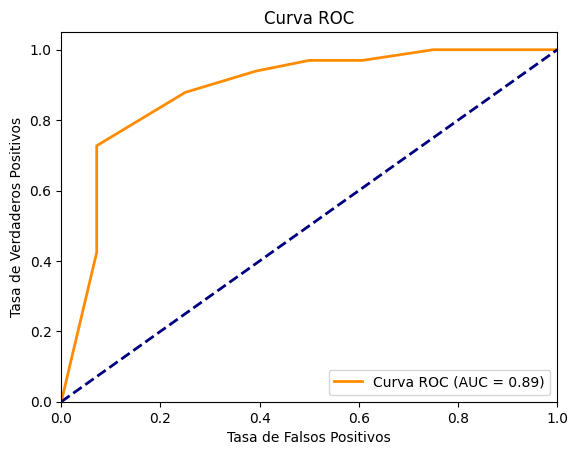

AUC (Area Under the Curve): 0.8852813852813852


In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

print('AUC (Area Under the Curve):', roc_auc)

**Conclusión rapida:** Como podemos ver, la correcta selección de hiperparametros nos permite mejor el rendimiento de nuestro modelo, acercando las curvas de train y test a valores mas aceptables. De manera simple y sencilla para este modelo, hemos utilizado formas de optimización:
- Selección de hiperparametro K correcta.
- Normalización de caracteristicas.

Si quisieramos ir un poco mas allá en la optimización de nuestro modelo, deberiamos ver otros tipos de normalización; reselección de caracteristicas; verificar el equilibrio de clases; cambiar la metrica de distancia del algoritmo; etc.

# -- xgboost --

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# estandarizar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear un clasificador XGBoost
model = xgb.XGBClassifier()

# Entrenar el modelo en el conjunto de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")


Precisión del modelo: 83.61%


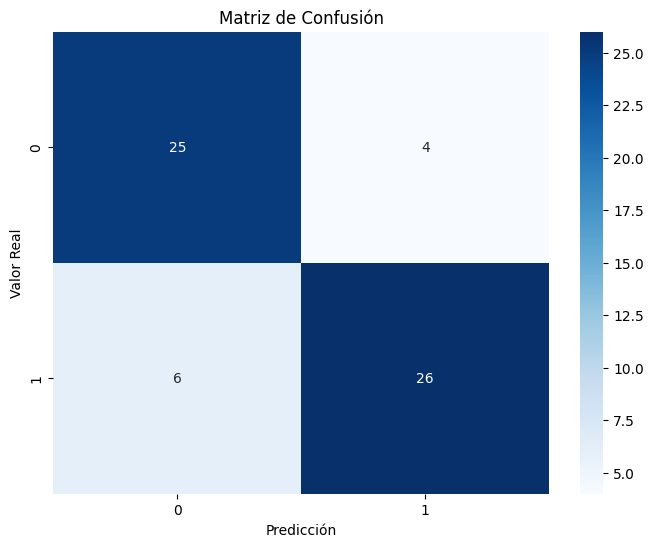

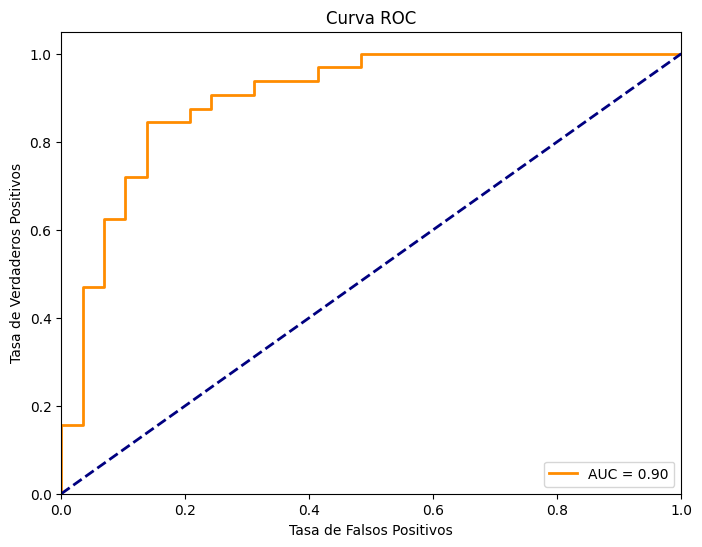

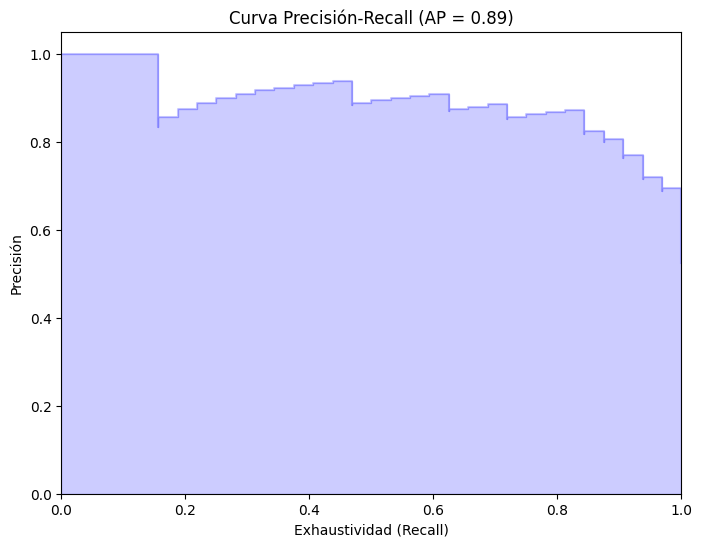

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()


from sklearn.metrics import roc_curve, roc_auc_score

probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()



from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, probs)
average_precision = average_precision_score(y_test, probs)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Exhaustividad (Recall)')
plt.ylabel('Precisión')
plt.title(f'Curva Precisión-Recall (AP = {average_precision:.2f})')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()




# -- NaiveBayes --

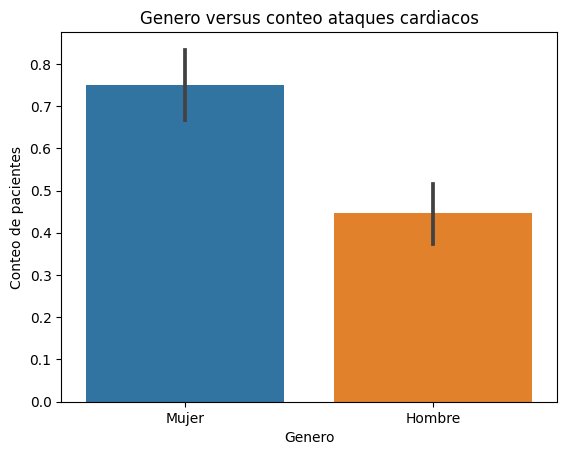

In [ ]:
# Sex vs Heart Attack
ax = sns.barplot(x = 'Genero',y = 'Diagnostico',data = df)
ax.set(xlabel='Genero', ylabel='Conteo de pacientes', title='Genero versus conteo ataques cardiacos')
ax.set_xticklabels(['Mujer', 'Hombre'])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
# X contendrá las características y y contendrá la variable objetivo que se utilizará para entrenar
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [ ]:
# dividir X e y en sets de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# comprobación de  X_train y X_test
X_train.shape, X_test.shape

((241, 13), (61, 13))

In [ ]:
# Standarizacion: No corresponde para Naive Bayes
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)


Los clasificadores Naive Bayes se basan en el Teorema de Bayes, uno de cuyos supuestos es la fuerte independencia entre las características. Asumen que el valor de una característica particular es independiente del valor de cualquier otra característica. Los clasificadores Bayes ingenuos necesitan pocos datos de entrenamiento para estimar los parámetros necesarios para la clasificación.


In [ ]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



Sesgo - Bias

In [ ]:
# calcular el bias
bias = np.mean(y_pred - y_test)

In [ ]:
 # calcular la varianza
variance = np.var(y_pred - y_test)

In [ ]:
# calcular el ruido irreductible
irreducible_noise = np.mean(metrics.mean_squared_error(y_test, np.ones(y_test.shape)))

In [ ]:
# imprimir los resultados
print(f'Bias: {bias}')
print(f'Varianza: {variance}')
print(f'Ruido irreductible: {irreducible_noise}')

Bias: -0.04918032786885246
Varianza: 0.11233539371136791
Ruido irreductible: 0.47540983606557374


Sesgo (Bias): Un valor de sesgo de 0.049 indica que el modelo tiende a cometer un error sistemático en sus predicciones. En este caso, un sesgo de 0.049 no es alto, lo que sugiere que el modelo tiene una tendencia relativamente baja a subestimar o sobreestimar las predicciones.

Varianza (Variance): Una varianza de 0.11 indica cuánto cambian las predicciones del modelo con respecto a diferentes conjuntos de datos de entrenamiento. Una varianza de 0.11 es moderada, lo que significa que el modelo es sensible a la elección de los datos de entrenamiento. Podría haber cierta inestabilidad en las predicciones si se utilizan conjuntos de datos diferentes.

Ruido Irreducible: Un valor de ruido irreducible de 0.47 sugiere que hay una cantidad significativa de variabilidad en los datos que no puede ser explicada ni eliminada por el modelo. Esto podría deberse a factores que están fuera del alcance del modelo, como errores de medición, factores no observables, etc.

En general, un sesgo bajo indica que el modelo es lo suficientemente flexible para captar la estructura subyacente en los datos. Una varianza moderada indica que el modelo no está demasiado sobreajustado ni demasiado subajustado. Por último, un ruido irreducible alto sugiere que hay factores no modelados que contribuyen a la variabilidad en las predicciones.

Los valores proporcionados sugieren un modelo que está razonablemente bien ajustado, pero podría haber oportunidades para mejorar la precisión si se reduce la varianza y/o se maneja el ruido irreducible si es posible.







In [ ]:
#puntuación de precisión del modelo
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy:", ("%.2f" % accuracy), "%")

Accuracy: 88.52 %


 De todas las muestras que el modelo ha intentado clasificar, el 88.52% de ellas fueron clasificadas correctamente.

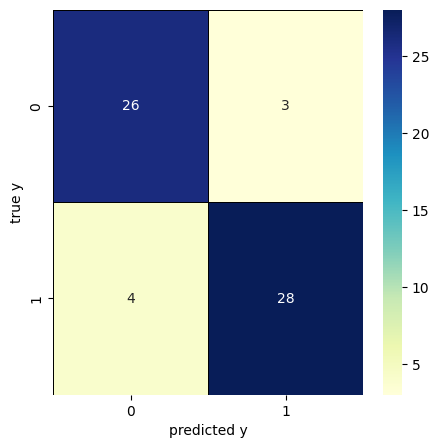

In [ ]:
#Matriz de confusión:

y_head = nb_model.predict(X_test)
y_true = y_test
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_head)


f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="Black", fmt=".0f", ax=ax,cmap='YlGnBu')
plt.xlabel("predicted y")
plt.ylabel("true y")
plt.show()

 Verdaderos Positivos (TP): Las instancias que el modelo predijo correctamente como positivas (enfermedad cardíaca) y que realmente son positivas. - Verdaderos Negativos (TN): Las instancias que el modelo predijo correctamente como negativas (sin enfermedad cardíaca) y que realmente son negativas. - Falsos Positivos (FP): Las instancias que el modelo predijo incorrectamente como positivas (enfermedad cardíaca) pero que en realidad son negativas. - Falsos Negativos (FN): Las instancias que el modelo predijo incorrectamente como negativas (sin enfermedad cardíaca) pero que en realidad son positivas

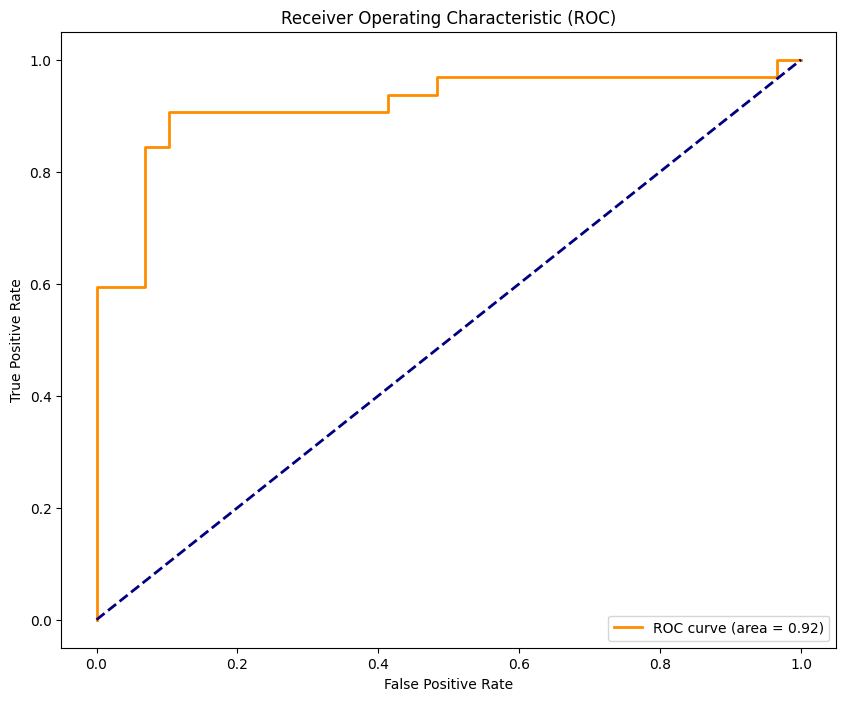

In [ ]:
from sklearn.metrics import roc_curve, auc


y_score =  nb_model.predict_proba(X_test)[:,1]  # Probabilidades de la clase positiva

fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


#permite evaluar la precisión de las predicciones de modelo al trazar la sensibilidad frente a la especificidad de una prueba de clasificación

La curva ROC es una representación gráfica que muestra cómo cambia la tasa de verdaderos positivos (TPR) en función de la tasa de falsos positivos (FPR) al variar el umbral de decisión del modelo. TPR se refiere a la proporción de verdaderos positivos con respecto a todos los casos positivos reales, y FPR se refiere a la proporción de falsos positivos con respecto a todos los casos negativos reales

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)

print(f'Precisión del modelo: {accuracy * 100:.2f}%')


Precisión del modelo: 88.52%


 En el caso de GaussianNB, no hay hiperparámetros para ajustar.La búsqueda en cuadrícula no se aplica directamente a modelos de Naive Bayes porque estos modelos tienen hiperparámetros muy simples o incluso no tienen hiperparámetros que requieran ajuste en el mismo sentido que otros algoritmos más complejos.


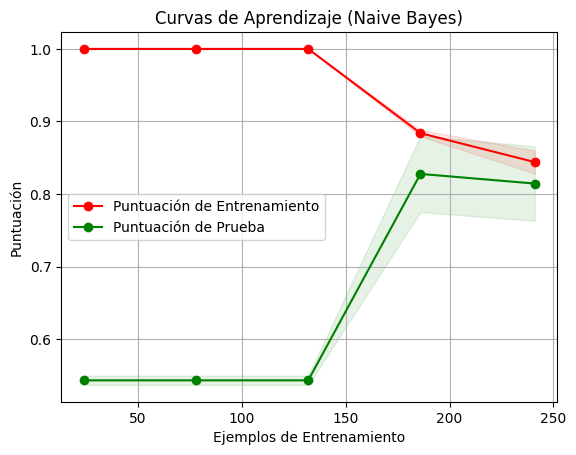

In [ ]:
from sklearn.model_selection import learning_curve


# Definir el modelo Naive Bayes
model = GaussianNB()

# Crear una función para graficar las curvas de aprendizaje
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Ejemplos de Entrenamiento")
    plt.ylabel("Puntuación")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Puntuación de Entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Puntuación de Prueba")

    plt.legend(loc="best")
    return plt

# Llamar a la función para generar las curvas de aprendizaje
title = "Curvas de Aprendizaje (Naive Bayes)"
plot_learning_curve(model, title, X, y, cv=5, n_jobs=-1)

plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Definir el modelo de Naive Bayes
nb_model = GaussianNB()

# Realizar validación cruzada
cv_scores = cross_val_score(nb_model, X, y, cv=5, scoring='accuracy')

# Imprimir los puntajes de validación cruzada
print("Puntajes de Validación Cruzada:", cv_scores)

# Calcular la media de los puntajes
mean_cv_score = np.mean(cv_scores)
print(f"Puntaje de Validación Cruzada Promedio: {mean_cv_score:.2f}")


Puntajes de Validación Cruzada: [0.80327869 0.8852459  0.8        0.85       0.73333333]
Puntaje de Validación Cruzada Promedio: 0.81


In [ ]:
#Selección de caracteríticas con CHi cuadrado
from sklearn.feature_selection import SelectKBest, chi2

# Definir el número de características a seleccionar
num_features = 10  # Por ejemplo, seleccionar las 10 mejores características

# Inicializar el selector de características
selector = SelectKBest(chi2, k=num_features)

# Aplicar la selección de características al conjunto de datos
X_selected = selector.fit_transform(X, y)

# Obtener los índices de las características seleccionadas
selected_indices = selector.get_support(indices=True)

# Obtener los nombres de las características seleccionadas
selected_features = [X.columns[i] for i in selected_indices]

# Imprimir las características seleccionadas
print("Características seleccionadas:")
print(selected_features)



Características seleccionadas:
['Edad', 'Genero', 'Dolor en pecho', 'Presión arterial reposo', 'Colesterol', 'Frecuencia Cardiaca', 'Angina por ejercicio', 'Depresión de ST', 'Pendiente ST', 'Numero de vasos']


La decisión de utilizar la puntuación de chi-cuadrado para la selección de características en un conjunto de datos pequeño con el modelo de Naive Bayes es una elección apropiada por varias razones:

Eficiencia Computacional: La puntuación de chi-cuadrado es una medida estadística relativamente eficiente y no requiere un proceso de entrenamiento complejo como algunos otros métodos de selección de características.

Adecuado para Conjuntos de Datos Pequeños: La puntuación de chi-cuadrado es especialmente útil en conjuntos de datos pequeños donde la complejidad de los modelos más avanzados podría llevar a un sobreajuste. Al ser una técnica relativamente simple, es menos propensa a sobreajustar el modelo.

Independencia de Características en Naive Bayes: El modelo de Naive Bayes asume independencia entre las características. La puntuación de chi-cuadrado, que mide la independencia entre dos variables, es coherente con esta suposición. Por lo tanto, es una opción lógica para seleccionar características relevantes en el contexto de Naive Bayes.

Interpretabilidad: La puntuación de chi-cuadrado proporciona una medida de la relación entre dos variables categóricas, lo que hace que sea fácil de interpretar y comprender para los usuarios.

Identificación de Características Informativas: La puntuación de chi-cuadrado destaca las características que tienen una mayor relación con la variable objetivo, lo que significa que te ayuda a identificar las características más informativas y relevantes para la clasificación.

Reducción de Dimensionalidad: Al seleccionar solo las características más relevantes, la puntuación de chi-cuadrado puede reducir la dimensionalidad del conjunto de datos, lo que a su vez puede llevar a modelos más simples y eficientes.

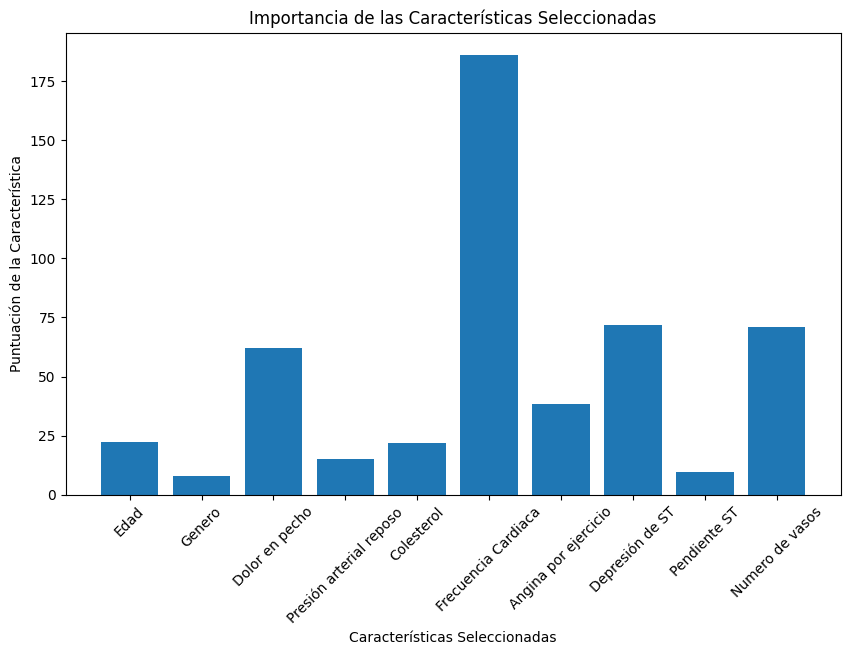

In [ ]:
#Selección de características a nivel gráfico

# Obtener las puntuaciones de las características seleccionadas
feature_scores = selector.scores_[selected_indices]

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(selected_features, feature_scores)
plt.xlabel('Características Seleccionadas')
plt.ylabel('Puntuación de la Característica')
plt.title('Importancia de las Características Seleccionadas')
plt.xticks(rotation=45)
plt.show()


# -- SVM --

**Importacion de librerias de Machine Learning**

- Division de datos en conjunto de entrenamiento y conjunto de prueba


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Dividir los datos en características (X) y etiquetas (y)
X = df.drop('Diagnostico', axis=1)  # Ajusta 'etiqueta' al nombre de tu columna de etiquetas
y = df['Diagnostico']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Escalamiento de datos**

La razón para escalar características es que muchos algoritmos de aprendizaje automático funcionan mejor cuando las características tienen una media cercana a cero y una desviación estándar cercana a uno. El escalado de características ayuda a igualar la importancia relativa de las diferentes características y puede mejorar el rendimiento del modelo.

In [ ]:
# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Busqueda de hiperparametros optimos para el modelo**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test)

In [ ]:
best_model

SVC(C=1, gamma=0.01, kernel='linear')

In [ ]:
best_params

{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}

**Creacion del algoritmo SVM**

- Entrenamiento

- Predicciones

- Evaluacion del modelo

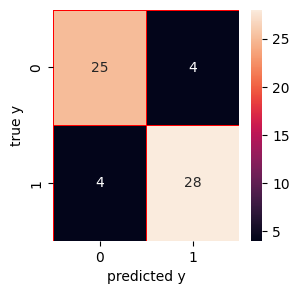

Exactitud (Accuracy): 86.89%

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
# Crear y entrenar el modelo SVM
svm_classifier = SVC(kernel='linear', C=0.1,gamma=0.01, probability=True)
svm_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_classifier.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("predicted y")
plt.ylabel("true y")
plt.show()

classification_rep = classification_report(y_test, y_pred)

print("Exactitud (Accuracy): {:.2f}%".format(accuracy * 100))
print("\nInforme de Clasificación:\n", classification_rep)

**Calculo de la curva ROC**

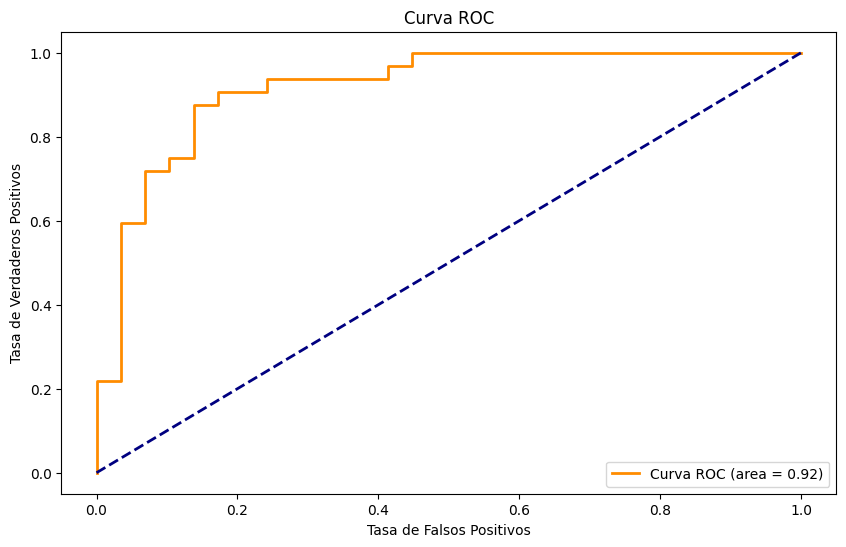

Área bajo la curva ROC (AUC): 0.92


In [ ]:
# CURVA ROC

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener las decisiones de función de distancia
y_decision = svm_classifier.decision_function(X_test)


# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_decision)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Imprimir la métrica AUC
print(f'Área bajo la curva ROC (AUC): {roc_auc:.2f}')

**Validacion cruzada**

In [ ]:
# calculate cross-validated ROC AUC
from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC = cross_val_score(svm_classifier, X_train, y_train, cv=10, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9043


**Evaluacion de la curva de aprendizaje**

# ---- AUTOMATIZACION ML ----

# -- Lazy Predict --

In [ ]:
from IPython.display import clear_output
!pip3 install -U lazypredict

clear_output()


In [ ]:
# Características numéricas

df.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#BB0000')\
                     .bar(subset=["mean",], color='green')

In [ ]:
# EDA diagnostico = 0 sin posibilidad de ataque cardiaco, 1= grandes posibilidades de ataques cardiacos
df['Diagnostico'].value_counts()

1    164
0    138
Name: Diagnostico, dtype: int64

In [ ]:
# Tipos de Dolor de Pecho
# 0 Angina
# 1 Angina Atipica
# 2 Dolor no de Angina
# 3 Asintomático
df['Dolor en pecho'].value_counts()


0    143
2     86
1     50
3     23
Name: Dolor en pecho, dtype: int64

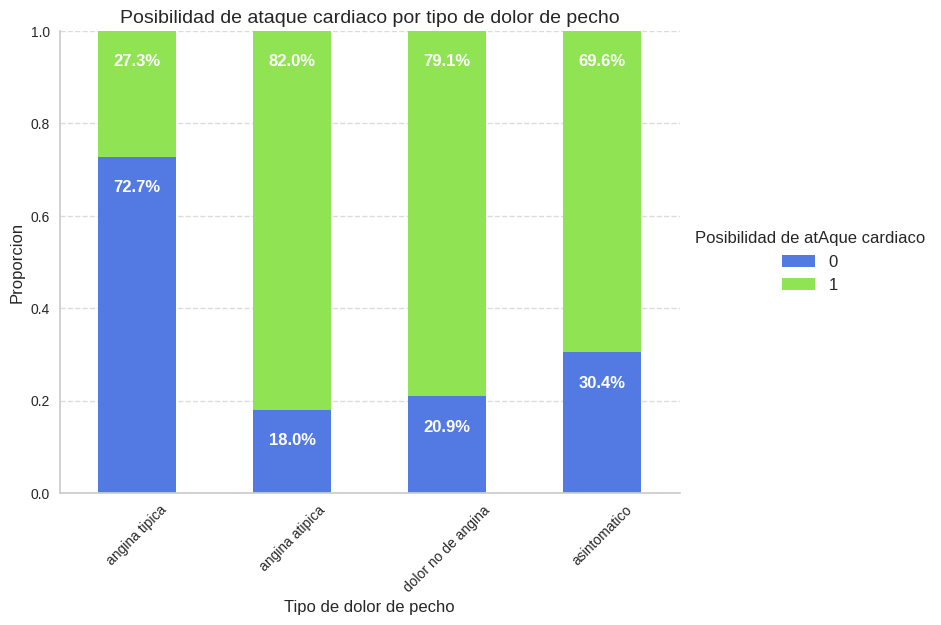

In [ ]:

colors = ["#537AE3", "#90E353"]
cross_tab = pd.crosstab(df['Dolor en pecho'], df['Diagnostico'], normalize='index')
ax = cross_tab.plot(kind='bar', stacked=True, color=colors, figsize=(8,6))
ax.set_xlabel('Tipo de dolor de pecho', fontsize=12)
ax.set_ylabel('Proporcion', fontsize=12)
ax.set_title('Posibilidad de ataque cardiaco por tipo de dolor de pecho', fontsize=14)
ax.legend(title='Posibilidad de atAque cardiaco', loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12)
plt.xticks(rotation=45)
plt.xticks([0, 1, 2, 3], ["angina tipica", "angina atipica", "dolor no de angina", "asintomatico"])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_ylim(0, 1)
for i in range(len(cross_tab)):
    for j in range(len(cross_tab.columns)):
        plt.text(i, cross_tab.iloc[i, :j+1].sum() - 0.05, str(round(cross_tab.iloc[i, j]*100,1)) + '%', ha='center', va='top', fontsize=12, fontweight='bold', color='white')
plt.show()

In [ ]:
df['Genero'].value_counts()

1    206
0     96
Name: Genero, dtype: int64

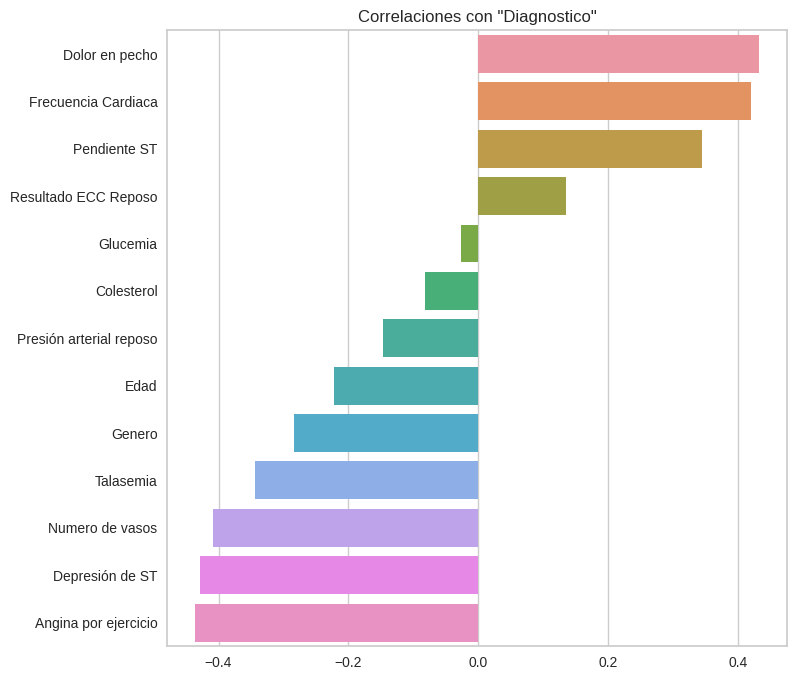

In [ ]:
# Correlaciones Pearson

limit = -1.0

data = df.corr()["Diagnostico"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(data[i])
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x=corr, y=labels, ax=ax)
plt.title('Correlaciones con "Diagnostico"')
plt.show()

In [ ]:
# Escalado de datos. Se decide  trabaar con Standar Scaler por la ausencia de outliers. Se deja el split en 0.80
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X = df.drop(columns="Diagnostico")
y = df["Diagnostico"]

scaled_data = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=123)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)


X Train :  (241, 13)
X Test  :  (61, 13)
Y Train :  (241,)
Y Test  :  (61,)


In [ ]:
# LazyClassifier
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=123,
                     classifiers='all')

models, predictions = clf.fit(X_train , X_test , y_train , y_test)
clear_output()

In [ ]:
models

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
GaussianNB                         0.84               0.83     0.83      0.84   
BernoulliNB                        0.82               0.82     0.82      0.82   
Perceptron                         0.80               0.80     0.80      0.80   
NearestCentroid                    0.80               0.80     0.80      0.80   
PassiveAggressiveClassifier        0.80               0.80     0.80      0.80   
QuadraticDiscriminantAnalysis      0.80               0.80     0.80      0.80   
LabelSpreading                     0.77               0.77     0.77      0.77   
LabelPropagation                   0.77               0.77     0.77      0.77   
KNeighborsClassifier               0.77               0.77     0.77      0.77   
RidgeClassifierCV                  0.75               0.75     0.75      0.75   
SGDClassifier                      0.75               0.75     0.75      0.75   
LinearDiscriminantAnalysis         0.75               0.75     0.75      0.75   
RidgeClassifier                    0.75               0.75     0.75      0.75   
LogisticRegression                 0.75               0.75     0.75      0.75   
CalibratedClassifierCV             0.75               0.75     0.75      0.75   
LinearSVC                          0.75               0.75     0.75      0.75   
ExtraTreesClassifier               0.75               0.75     0.75      0.75   
RandomForestClassifier             0.74               0.74     0.74      0.74   
SVC                                0.74               0.74     0.74      0.74   
AdaBoostClassifier                 0.72               0.72     0.72      0.72   
NuSVC                              0.72               0.72     0.72      0.72   
DecisionTreeClassifier             0.72               0.72     0.72      0.72   
XGBClassifier                      0.72               0.72     0.72      0.72   
LGBMClassifier                     0.69               0.69     0.69      0.69   
BaggingClassifier                  0.69               0.69     0.69      0.69   
ExtraTreeClassifier                0.67               0.67     0.67      0.67   
DummyClassifier                    0.49               0.50     0.50      0.32   

                               Time Taken  
Model                                      
GaussianNB                           0.02  
BernoulliNB                          0.01  
Perceptron                           0.02  
NearestCentroid                      0.04  
PassiveAggressiveClassifier          0.05  
QuadraticDiscriminantAnalysis        0.01  
LabelSpreading                       0.02  
LabelPropagation                     0.02  
KNeighborsClassifier                 0.01  
RidgeClassifierCV                    0.01  
SGDClassifier                        0.01  
LinearDiscriminantAnalysis           0.02  
RidgeClassifier                      0.02  
LogisticRegression                   0.03  
CalibratedClassifierCV               0.06  
LinearSVC                            0.03  
ExtraTreesClassifier                 0.14  
RandomForestClassifier               0.18  
SVC                                  0.02  
AdaBoostClassifier                   0.11  
NuSVC                                0.05  
DecisionTreeClassifier               0.01  
XGBClassifier                        0.05  
LGBMClassifier                       0.10  
BaggingClassifier                    0.04  
ExtraTreeClassifier                  0.01  
DummyClassifier                      0.01

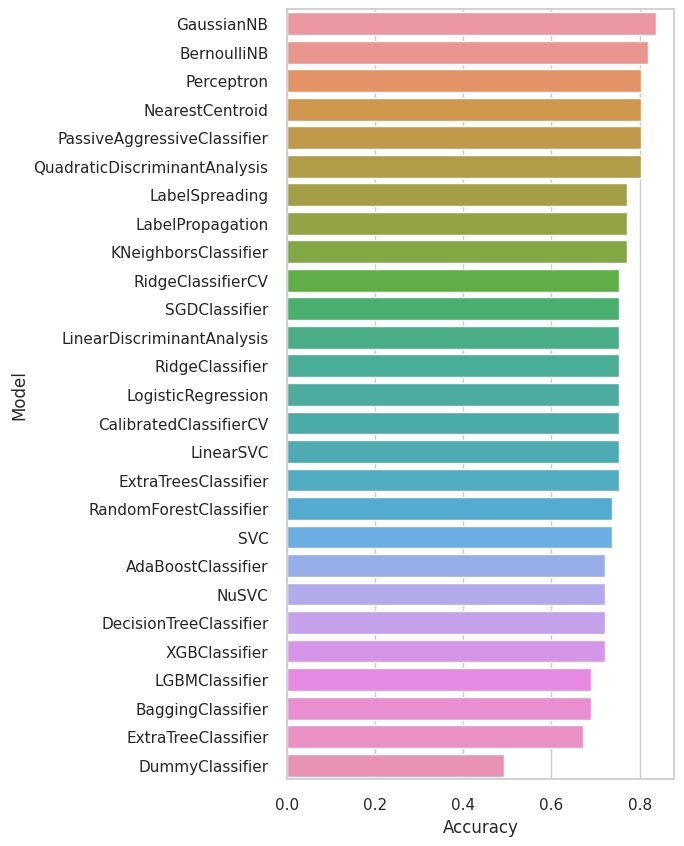

In [ ]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="Accuracy", data=predictions)

Luego de verificar el desmepeño de los diferentes clasificadores de verifica que Naive Bayes es el mejor en la lista

# -- Pycaret--

In [ ]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 62.7 MB/s et

In [ ]:
import pycaret
pycaret.__version__

'3.1.0'

In [ ]:
pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.9 MB/s eta 0:00:00


In [ ]:
# import pycaret classification and init setup train test split 80/20, normalización:minmax

# data= pd.read_csv ("/content/heart.csv")
data= pd.read_csv ("https://raw.githubusercontent.com/monsegutier/Grupo4-PP1--Proyecto-ML/main/data/heart.csv")

from pycaret.classification import *
s = setup(data, target='Diagnostico', session_id=123, log_experiment=True, experiment_name='Ataques cardiacos',
          fix_imbalance=True, normalize=True, normalize_method='zscore', train_size=0.8)


2023/10/30 19:59:04 INFO mlflow.tracking.fluent: Experiment with name 'Ataques cardiacos' does not exist. Creating a new experiment.


In [ ]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [ ]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [ ]:
# init setup on exp
exp.setup(data, target = 'Diagnostico', session_id = 123)

In [ ]:
# compare baseline models
best = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# compare models using OOP Usar OOP en la comparación de modelos en PyCaret puede ser especialmente útil cuando necesitas automatizar la selección y evaluación de modelos en diferentes escenarios o para diferentes conjuntos de datos

exp.compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GaussianNB(priors=None, var_smoothing=1e-09)

Análisis del Modelo

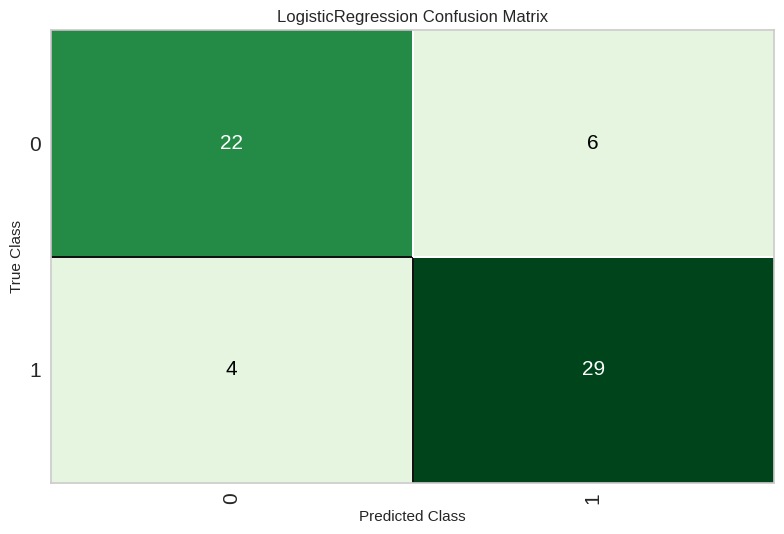

In [ ]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')



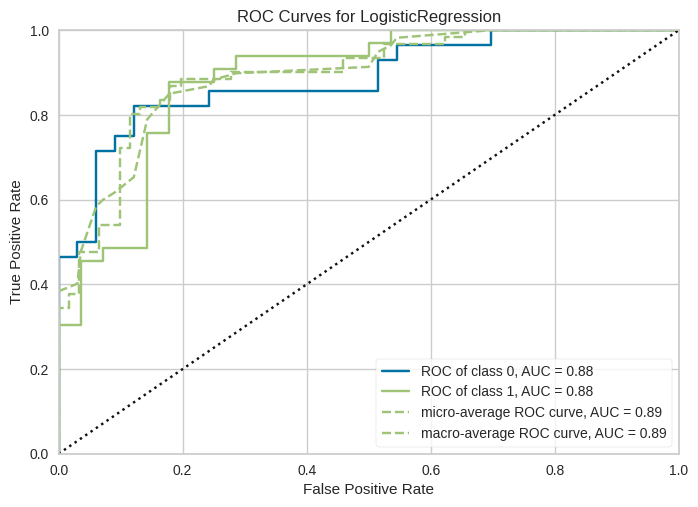

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')

Predicción del Modelo


In [ ]:
# predict on test set
holdout_pred = predict_model(best)

In [ ]:
# show predictions df
holdout_pred.head()

Edad  Genero  Dolor en pecho  Presión arterial reposo  Colesterol  \
233    64       1               0                      120         246   
243    57       1               0                      152         274   
121    59       1               0                      138         271   
163    38       1               2                      138         175   
238    77       1               0                      125         304   

     Glucemia  Resultado ECC Reposo  Frecuencia Cardiaca  \
233         0                     0                   96   
243         0                     1                   88   
121         0                     0                  182   
163         0                     1                  173   
238         0                     0                  162   

     Angina por ejercicio  Depresión de ST  Pendiente ST  Numero de vasos  \
233                     1              2.2             0                1   
243                     1              1.2             1                1   
121                     0              0.0             2                0   
163                     0              0.0             2                4   
238                     1              0.0             2                3   

     Talasemia  Diagnostico  prediction_label  prediction_score  
233          2            0                 0            0.9937  
243          3            0                 0            0.9970  
121          2            1                 1            0.7897  
163          2            1                 0            0.5445  
238          2            0                 0            0.8750

Crear Modelo

In [ ]:
nb = create_model('nb')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
models(type='ensemble').index.tolist()

['rf', 'ada', 'gbc', 'et', 'xgboost', 'lightgbm']

In [ ]:
whitelist = models(type='ensemble').index.tolist()

In [ ]:
ensembled_models = compare_models(whitelist, fold = 3)

Processing:   0%|          | 0/29 [00:00<?, ?it/s]

Optimización de Hiperparámetros

In [ ]:
tuned_nb = tune_model(nb)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
bestModel = automl(optimize ='AUC')

In [ ]:
print (bestModel)

GaussianNB(priors=None, var_smoothing=1)


In [ ]:
tuned_bestModel = tune_model(bestModel, optimize='AUC')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
print (tuned_bestModel)

GaussianNB(priors=None, var_smoothing=1)


In [ ]:
bestModel = automl(optimize ='Accuracy')

In [ ]:
tuned_bestModel = tune_model(bestModel, optimize='Accuracy')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
print (tuned_bestModel)

GaussianNB(priors=None, var_smoothing=1)


In [ ]:
bestModel = automl(optimize ='F1')

In [ ]:
tuned_bestModel = tune_model(bestModel, optimize='F1')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
print (tuned_bestModel)

GaussianNB(priors=None, var_smoothing=1)


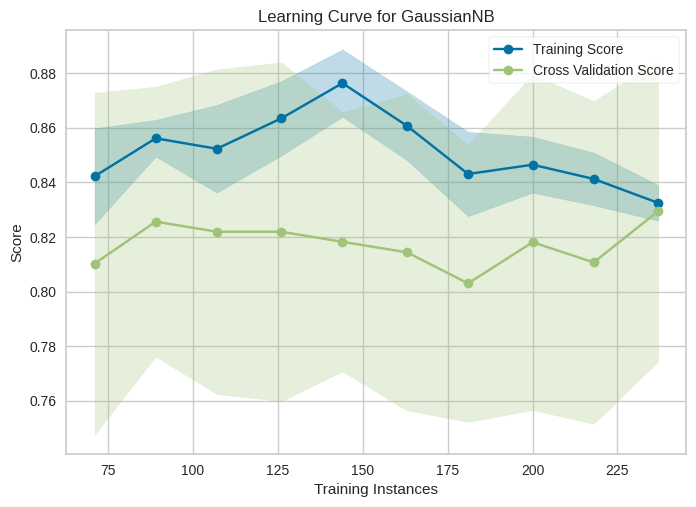

In [ ]:
plot_model(tuned_bestModel, plot ='learning')

In [ ]:
tuned_lr = tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_rf = tune_model(rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Ensamble

In [ ]:
models()


Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
xgboost         Extreme Gradient Boosting   
lightgbm  Light Gradient Boosting Machine   
dummy                    Dummy Classifier   

                                                  Reference  Turbo  
ID                                                                  
lr        sklearn.linear_model._logistic.LogisticRegression   True  
knn       sklearn.neighbors._classification.KNeighborsCl...   True  
nb                           sklearn.naive_bayes.GaussianNB   True  
dt             sklearn.tree._classes.DecisionTreeClassifier   True  
svm       sklearn.linear_model._stochastic_gradient.SGDC...   True  
rbfsvm                             sklearn.svm._classes.SVC  False  
gpc       sklearn.gaussian_process._gpc.GaussianProcessC...  False  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
ridge           sklearn.linear_model._ridge.RidgeClassifier   True  
rf          sklearn.ensemble._forest.RandomForestClassifier   True  
qda       sklearn.discriminant_analysis.QuadraticDiscrim...   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostClas...   True  
gbc         sklearn.ensemble._gb.GradientBoostingClassifier   True  
lda       sklearn.discriminant_analysis.LinearDiscrimina...   True  
et            sklearn.ensemble._forest.ExtraTreesClassifier   True  
xgboost                       xgboost.sklearn.XGBClassifier   True  
lightgbm                    lightgbm.sklearn.LGBMClassifier   True  
dummy                         sklearn.dummy.DummyClassifier   True

In [ ]:
bagged_nb = ensemble_model(nb)

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
boosted_lr = ensemble_model(lr, method = 'Boosting')

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Blend Models

In [ ]:
blender = blend_models(estimator_list = [boosted_lr, bagged_nb, tuned_lr], method = 'soft')

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
#Stacking

In [ ]:
stacker = stack_models(estimator_list = [boosted_lr,bagged_nb,tuned_lr], meta_model=lr)

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Calibración

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

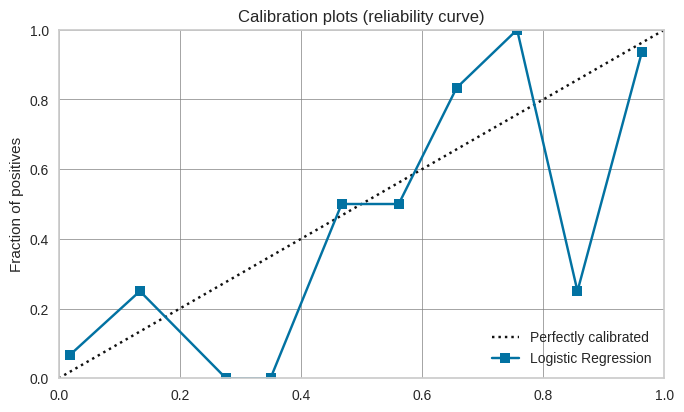

In [ ]:
lr = create_model('lr')
plot_model(lr, plot='calibration')

In [ ]:
calibrated_lr = calibrate_model(lr)

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

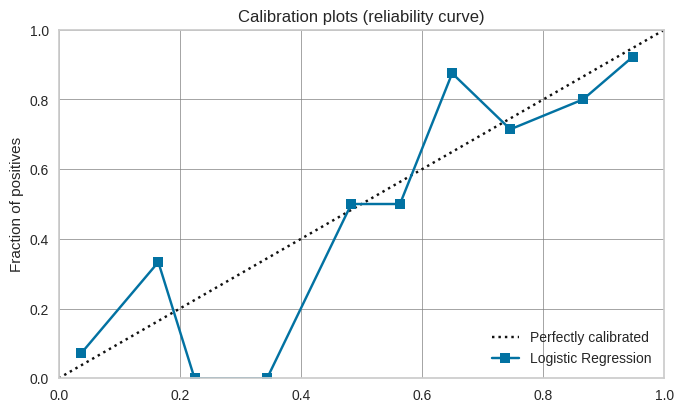

In [ ]:
plot_model(calibrated_lr, plot='calibration')

Analisis del Modelo

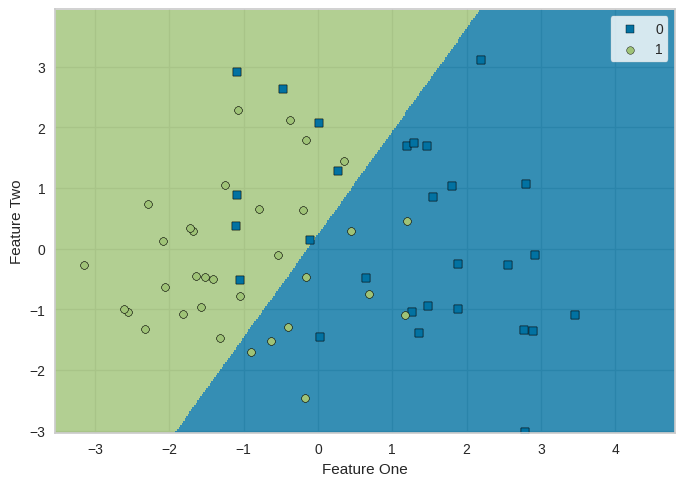

In [ ]:
plot_model(lr, plot = 'boundary')

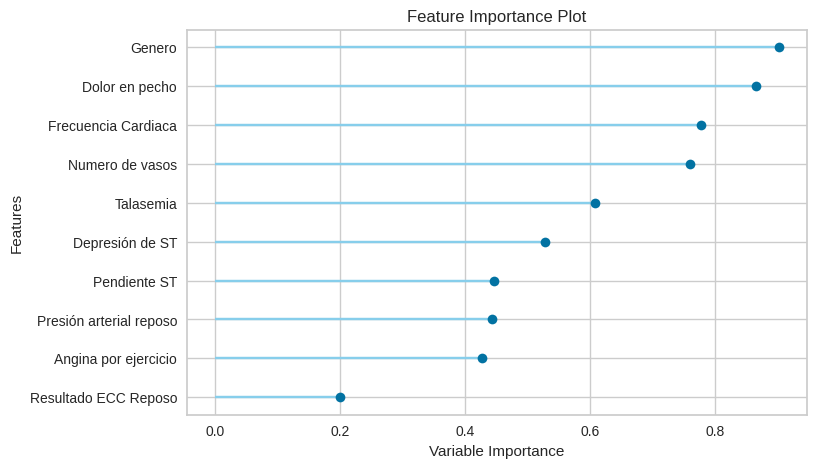

In [ ]:
plot_model(lr, plot = 'feature')

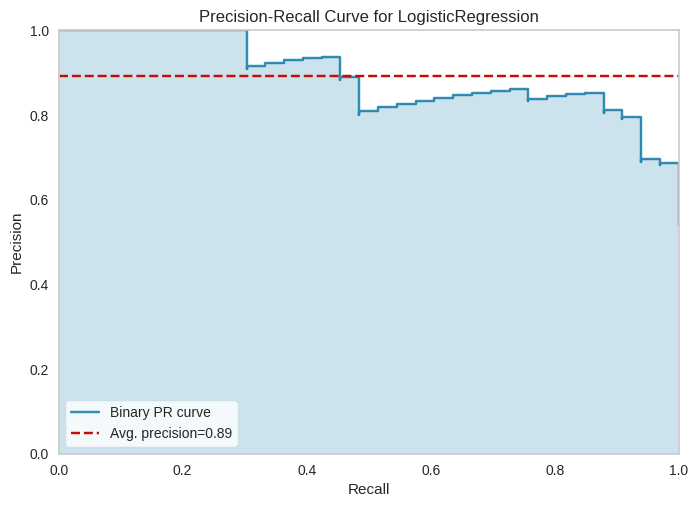

In [ ]:
plot_model(lr, plot = 'pr')

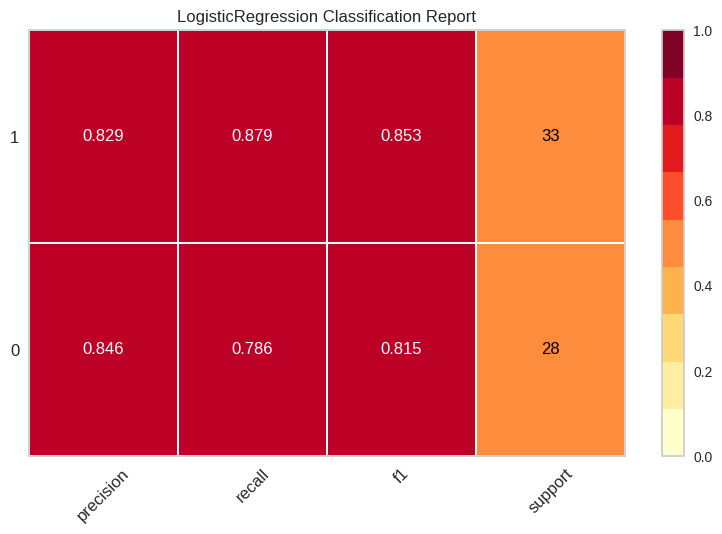

In [ ]:
plot_model(lr, plot = 'class_report')

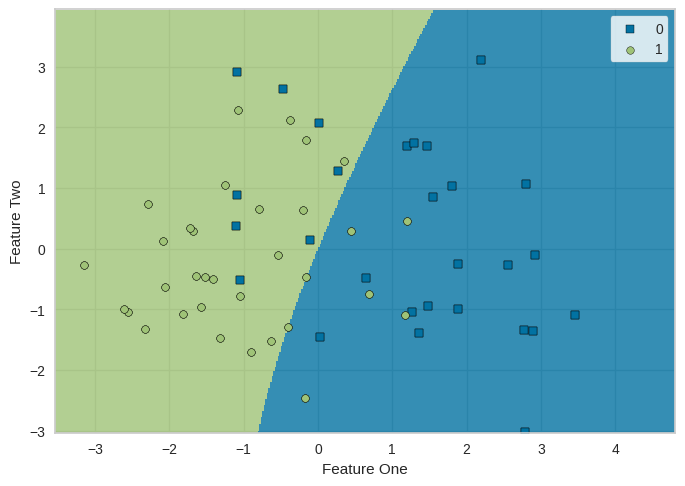

In [ ]:
plot_model(nb, plot = 'boundary')

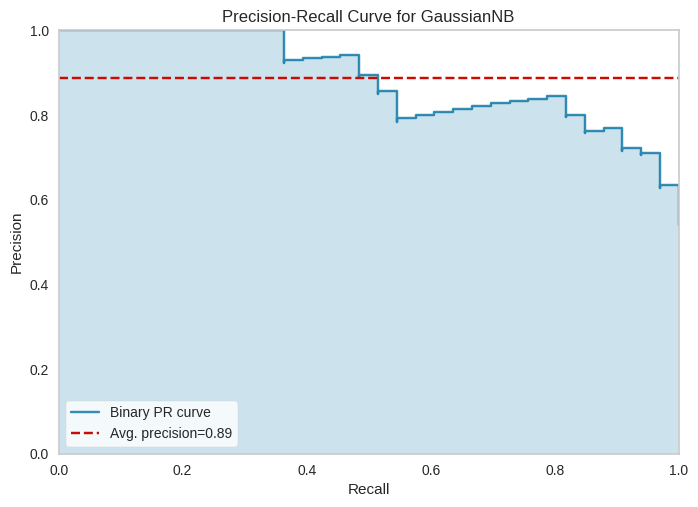

In [ ]:
plot_model(nb, plot = 'pr')

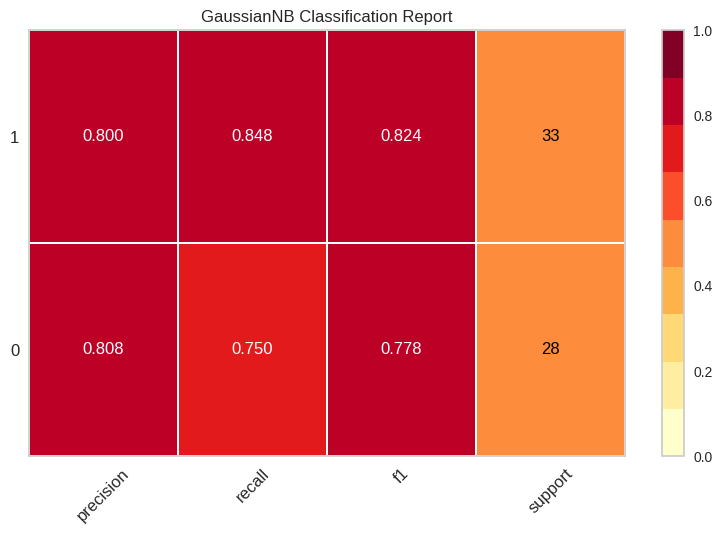

In [ ]:
plot_model(nb, plot = 'class_report')

Interpretación del modelo

In [ ]:
# Finalización del modelo
final_model = finalize_model (tuned_bestModel)

In [ ]:
print (final_model)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Edad', 'Genero', 'Dolor en pecho',
                                             'Presión arterial reposo',
                                             'Colesterol', 'Glucemia',
                                             'Resultado ECC Reposo',
                                             'Frecuencia Cardiaca',
                                             'Angina por ejercicio',
                                             'Depresión de ST', 'Pendiente ST',
                                             'Numero de vasos', 'Talasemia'],
                                    transformer=SimpleImputer(add_indicator=Fa...
                                                                              sampling_strategy='auto')))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
 

In [ ]:
save_model(final_model,'FinalModel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Edad', 'Genero', 'Dolor en pecho',
                                              'Presión arterial reposo',
                                              'Colesterol', 'Glucemia',
                                              'Resultado ECC Reposo',
                                              'Frecuencia Cardiaca',
                                              'Angina por ejercicio',
                                              'Depresión de ST', 'Pendiente ST',
                                              'Numero de vasos', 'Talasemia'],
                                     transformer=SimpleImputer(add_indicator=Fa...
                                                                               sampling_strategy='auto')))),
                 ('normalize',
                  TransformerWrapper(exclude=None, 

# Widget para ingresar valores manualmente

In [ ]:

import ipywidgets as widgets
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder



# Cargar el modelo entrenado (reemplaza 'mi_modelo.pkl' con tu modelo entrenado)
# clf = DecisionTreeClassifier()  # Carga tu modelo aquí

# crear widgets 2
Edad = widgets.IntSlider(value=50, min=20, max=100, description='Edad:')
Genero = widgets.RadioButtons(options=['Masculino', 'Femenino'], description='Generoo:')
Dolor_en_pecho = widgets.Dropdown(options=['Angina Típica', 'Angina Atípica', 'Dolor no Anginoso', 'Asintomático'],
                      description='Tipo de Dolor en el Pecho:')
Presión_arterial_reposo = widgets.IntSlider(value=120, min=90, max=200, description='Presión Arterial en Reposo:')
Colesterol = widgets.IntSlider(value=200, min=100, max=400, description='Colesterol (mg/dL):')
Glucemia = widgets.RadioButtons(options=[0, 1], description='Azúcar en Sangre en Ayunas (0 = No, 1 = Sí):'
              ,layout=widgets.Layout(width='600px'))
Resultado_ECC_Reposo = widgets.Dropdown(options=['Normal', 'ST-T Anormal', 'Probable o Definitiva Hipertrofia LV'], description='Electrocardiograma en Reposo:')
Frecuencia_Cardiaca = widgets.IntSlider(value=150, min=70, max=210, description='Frecuencia Cardíaca Máxima:')
Angina_por_ejercicio = widgets.RadioButtons(options=[0, 1], description='Angina Inducida por Ejercicio (0 = No, 1 = Sí):')
Depresión_de_ST = widgets.FloatSlider(value=1.0, min=0.0, max=6.2, description='Depresión del ST inducida por el Ejercicio:')
Pendiente_ST = widgets.Dropdown(options=[0, 1, 2], description='Inclinación del Segmento ST:')
Numero_de_vasos = widgets.IntSlider(value=0, min=0, max=3, description='Vasos Mayores Coloreados por la Fluroscopía:')
Talasemia = widgets.IntSlider(value=2, min=0, max=3, description='Resultados del Estudio con Talio:')




# Crear función para realizar predicción
def predict(sender):

# Borrar la salida anterior

 # Obtener valores de los widgets
    Edad_val = Edad.value
    Genero_val = 1 if Genero.value == 'Masculino' else 0
    label_encoder = LabelEncoder()
    Dolor_en_pecho_val = label_encoder.fit_transform([Dolor_en_pecho.value])[0]
    Resultado_ECC_Reposo_val = label_encoder.fit_transform([Resultado_ECC_Reposo.value])[0]
    Talasemia_val = label_encoder.fit_transform([Talasemia.value])[0]
    Presión_arterial_reposo_val = Presión_arterial_reposo.value
    Colesterol_val =  Colesterol.value
    Glucemia_val = Glucemia.value
    Frecuencia_Cardiaca_val = Frecuencia_Cardiaca.value
    Angina_por_ejercicio_val =  Angina_por_ejercicio.value
    Depresión_de_ST_val = Depresión_de_ST.value
    Pendiente_ST_val = Pendiente_ST.value
    Numero_de_vasos_val =  Numero_de_vasos.value



    # Crear un DataFrame con los valores del usuario
    new_patient_data = pd.DataFrame({
        'Edad': [Edad_val],
        'Genero': [Genero_val],
        'Dolor en pecho': [Dolor_en_pecho_val],
        'Presión arterial reposo': [Presión_arterial_reposo_val],
        'Colesterol': [Colesterol_val],
        'Glucemia': [Glucemia_val],
        'Resultado ECC Reposo': [Resultado_ECC_Reposo_val],
        'Frecuencia Cardiaca': [Frecuencia_Cardiaca_val],
        'Angina por ejercicio': [Angina_por_ejercicio_val],
        'Depresión de ST': [Depresión_de_ST_val],
        'Pendiente ST': [Pendiente_ST_val],
        'Numero de vasos': [Numero_de_vasos_val],
        'thall': [Talasemia_val]

    })

    # Realizar la predicción con el modelo
    prediction = clf.predict(new_patient_data)

    # Muestra el resultado de la predicción
    print(f'El paciente tiene una probabilidad de ataque al corazón de: {prediction[0]}')

# Crear botón para realizar la predicción
predict_button = widgets.Button(description='Realizar Predicción')
predict_button.on_click(predict)

# Mostrar widgets en el entorno de Colab
# Mostrar todos los widgets en una sola línea
display(Edad, Genero, Dolor_en_pecho, Presión_arterial_reposo,  Colesterol, Glucemia, Resultado_ECC_Reposo, Frecuencia_Cardiaca,  Angina_por_ejercicio, Depresión_de_ST, Pendiente_ST,  Numero_de_vasos,Talasemia, predict_button)



IntSlider(value=50, description='Edad:', min=20)

RadioButtons(description='Generoo:', options=('Masculino', 'Femenino'), value='Masculino')

Dropdown(description='Tipo de Dolor en el Pecho:', options=('Angina Típica', 'Angina Atípica', 'Dolor no Angin…

IntSlider(value=120, description='Presión Arterial en Reposo:', max=200, min=90)

IntSlider(value=200, description='Colesterol (mg/dL):', max=400, min=100)

RadioButtons(description='Azúcar en Sangre en Ayunas (0 = No, 1 = Sí):', layout=Layout(width='600px'), options…

Dropdown(description='Electrocardiograma en Reposo:', options=('Normal', 'ST-T Anormal', 'Probable o Definitiv…

IntSlider(value=150, description='Frecuencia Cardíaca Máxima:', max=210, min=70)

RadioButtons(description='Angina Inducida por Ejercicio (0 = No, 1 = Sí):', options=(0, 1), value=0)

FloatSlider(value=1.0, description='Depresión del ST inducida por el Ejercicio:', max=6.2)

Dropdown(description='Inclinación del Segmento ST:', options=(0, 1, 2), value=0)

IntSlider(value=0, description='Vasos Mayores Coloreados por la Fluroscopía:', max=3)

IntSlider(value=2, description='Resultados del Estudio con Talio:', max=3)

Button(description='Realizar Predicción', style=ButtonStyle())